<h2>Dataset Loading</h2>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.signal import find_peaks
from scipy.stats import gaussian_kde

df = pd.read_csv("parkinsons.data") #loading dataset onto Pandas dataframe
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 30)
print(df.shape) #dataset dimension
df.head(12)

(195, 24)


,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,phon_R01_S01_6,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,0.456,0.02328,0.03526,0.03243,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
6,phon_R01_S02_1,120.267,137.244,114.820,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608,0.140,0.00779,0.00937,0.01351,0.02337,0.00607,24.886,1,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
7,phon_R01_S02_2,107.332,113.840,104.315,0.00290,0.00003,0.00144,0.00182,0.00431,0.01567,0.134,0.00829,0.00946,0.01256,0.02487,0.00344,26.892,1,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
8,phon_R01_S02_3,95.730,132.068,91.754,0.00551,0.00006,0.00293,0.00332,0.00880,0.02093,0.191,0.01073,0.01277,0.01717,0.03218,0.01070,21.812,1,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
9,phon_R01_S02_4,95.056,120.103,91.226,0.00532,0.00006,0.00268,0.00332,0.00803,0.02838,0.255,0.01441,0.01725,0.02444,0.04324,0.01022,21.862,1,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362


<h2>Data Properties and Preprocessing</h2>

In [2]:
df.dtypes #datatypes of each feature in the dataframe

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

In [3]:
df.isna().sum() #check for null values

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [4]:
df.loc[df.duplicated()] #check for duplicated values

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE


In [ ]:
numerical_values = df.select_dtypes(exclude="object").columns.to_list() #selecting features with numerical values
num_dataframe = pd.DataFrame(df, columns=numerical_values) #dataframe with only numerical features

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,0.015664,0.017878,0.024081,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,0.010153,0.012024,0.016947,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,0.004550,0.005700,0.007190,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,0.008245,0.009580,0.013080,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,0.012790,0.013470,0.018260,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,0.020265,0.022380,0.029400,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,0.056470,0.079400,0.137780,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [81]:
new_dataframe = num_dataframe.drop("status", axis=1) #dataframe without status feature
new_dataframe.reset_index(drop=True)
new_dataframe

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,0.02336,0.02498,0.02745,0.07008,0.02764,19.517,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,0.01604,0.01657,0.01879,0.04812,0.01810,19.147,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,0.01268,0.01365,0.01667,0.03804,0.10715,17.883,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,0.01265,0.01321,0.01588,0.03794,0.07223,19.020,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [82]:
healthy_df = num_dataframe.query("status == 0") #new dataframe for healthy subjects
healthy_dropped = healthy_df.drop("status", axis=1) #healthy dataframe without status
healthy_dropped.reset_index(drop=True)
healthy_features = healthy_dropped.columns #array of feature names
healthy_dropped.shape

(48, 22)

In [ ]:
patient_df = num_dataframe.query("status == 1") #new dataframe for patients
patient_dropped = patient_df.drop("status", axis=1) #patient dataframe without status
patient_dropped.reset_index(drop=True)
patient_features = patient_dropped.columns #array of feature names
patient_dropped.shape

<h2>Exploratory Data Analysis</h2>

<h3>Summary Statistics</h3>

In [64]:
dscn = num_dataframe.describe() #general statistical description of the numerical dataset
dscn

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,0.015664,0.017878,0.024081,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,0.010153,0.012024,0.016947,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,0.004550,0.005700,0.007190,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,0.008245,0.009580,0.013080,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,0.012790,0.013470,0.018260,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,0.020265,0.022380,0.029400,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,0.056470,0.079400,0.137780,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [90]:
new_dataframe.skew() #skewness of each feature without status

MDVP:Fo(Hz)         0.591737
MDVP:Fhi(Hz)        2.542146
MDVP:Flo(Hz)        1.217350
MDVP:Jitter(%)      3.084946
MDVP:Jitter(Abs)    2.649071
MDVP:RAP            3.360708
MDVP:PPQ            3.073892
Jitter:DDP          3.362058
MDVP:Shimmer        1.666480
MDVP:Shimmer(dB)    1.999389
Shimmer:APQ3        1.580576
Shimmer:APQ5        1.798697
MDVP:APQ            2.618047
Shimmer:DDA         1.580618
NHR                 4.220709
HNR                -0.514317
RPDE               -0.143402
DFA                -0.033214
spread1             0.432139
spread2             0.144430
D2                  0.430384
PPE                 0.797491
dtype: float64

In [91]:
healthy_dropped.describe() #general statisitics for healthy subjects

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.00000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,181.937771,223.636750,145.207292,0.003866,0.000023,0.001925,0.002056,0.005776,0.017615,0.162958,0.009504,0.010509,0.013305,0.028511,0.011483,24.67875,0.442552,0.695716,-6.759264,0.160292,2.154491,0.123017
std,52.731067,96.727067,58.757070,0.002055,0.000015,0.001066,0.000943,0.003199,0.005544,0.057822,0.003456,0.003231,0.003825,0.010368,0.019088,3.43454,0.092199,0.051346,0.642782,0.062982,0.310269,0.044820
min,110.739000,113.597000,74.287000,0.001780,0.000007,0.000920,0.001060,0.002760,0.009540,0.085000,0.004680,0.006060,0.007190,0.014030,0.000650,17.88300,0.256570,0.626710,-7.964984,0.006274,1.423287,0.044539
25%,120.947500,139.413250,98.243750,0.002655,0.000010,0.001332,0.001480,0.003998,0.014475,0.129000,0.007350,0.008193,0.011235,0.022060,0.004188,22.99325,0.372126,0.654291,-7.257665,0.120623,1.974217,0.094658
50%,198.996000,231.161500,113.938500,0.003355,0.000025,0.001625,0.001775,0.004875,0.016705,0.154000,0.008775,0.010225,0.013015,0.026330,0.004825,24.99700,0.435368,0.682527,-6.826448,0.167356,2.129510,0.115118
75%,229.077000,251.239250,199.183000,0.004530,0.000030,0.001908,0.002228,0.005725,0.020210,0.189250,0.011512,0.011980,0.015945,0.034540,0.009213,26.13925,0.507748,0.742284,-6.350146,0.193766,2.339487,0.147761
max,260.105000,592.030000,239.170000,0.013600,0.000080,0.006240,0.005640,0.018730,0.040870,0.405000,0.023360,0.024980,0.027450,0.070080,0.107150,33.04700,0.663842,0.785714,-5.198864,0.291954,2.882450,0.252404


In [ ]:
healthy_dropped.skew() #skewness of features in healthy status

MDVP:Fo(Hz)        -0.206080
MDVP:Fhi(Hz)        2.191357
MDVP:Flo(Hz)        0.454401
MDVP:Jitter(%)      2.595196
MDVP:Jitter(Abs)    1.203508
MDVP:RAP            2.227438
MDVP:PPQ            1.898408
Jitter:DDP          2.227230
MDVP:Shimmer        1.632775
MDVP:Shimmer(dB)    1.744643
Shimmer:APQ3        1.495943
Shimmer:APQ5        2.005412
MDVP:APQ            1.043889
Shimmer:DDA         1.495657
NHR                 3.702145
HNR                 0.363758
status              0.000000
RPDE                0.311439
DFA                 0.278665
spread1             0.414532
spread2            -0.253889
D2                  0.007316
PPE                 0.826011
dtype: float64

In [93]:
patient_dropped.describe() #general statisitics for patients

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
count,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000
mean,145.180762,188.441463,106.893558,0.006989,0.000051,0.003757,0.003900,0.011273,0.033658,0.321204,0.017676,0.020285,0.027600,0.053027,0.029211,20.974048,0.516816,0.725408,-5.333420,0.248133,2.456058,0.233828
std,32.348050,88.339180,32.274358,0.005240,0.000037,0.003241,0.002998,0.009724,0.019970,0.207798,0.010797,0.012847,0.018062,0.032391,0.044447,4.339143,0.101254,0.054786,0.970792,0.077809,0.375742,0.084271
min,88.333000,102.145000,65.476000,0.001680,0.000010,0.000680,0.000920,0.002040,0.010220,0.090000,0.004550,0.005700,0.008110,0.013640,0.002310,8.441000,0.263654,0.574282,-7.120925,0.063412,1.765957,0.093193
25%,117.572000,133.776500,80.875500,0.004005,0.000030,0.002030,0.002190,0.006085,0.018295,0.168000,0.009135,0.010575,0.015555,0.027400,0.008445,18.782000,0.439064,0.685569,-6.038300,0.199507,2.180933,0.170103
50%,145.174000,163.335000,99.770000,0.005440,0.000040,0.002840,0.003140,0.008530,0.028380,0.263000,0.014840,0.016500,0.021570,0.044510,0.016580,21.414000,0.530529,0.726652,-5.440040,0.240875,2.439597,0.222716
75%,170.071000,207.160500,129.240000,0.007670,0.000060,0.004100,0.004360,0.012300,0.042525,0.394500,0.022815,0.024935,0.034825,0.068455,0.027960,24.164500,0.604573,0.764868,-4.664067,0.303660,2.668479,0.274397
max,223.361000,588.518000,199.020000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,0.056470,0.079400,0.137780,0.169420,0.314820,29.928000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [94]:
patient_dropped.skew() #skewness of features in patient status

MDVP:Fo(Hz)         0.366850
MDVP:Fhi(Hz)        2.803273
MDVP:Flo(Hz)        0.893664
MDVP:Jitter(%)      2.857486
MDVP:Jitter(Abs)    2.554055
MDVP:RAP            3.059989
MDVP:PPQ            2.791292
Jitter:DDP          3.061427
MDVP:Shimmer        1.370146
MDVP:Shimmer(dB)    1.716727
Shimmer:APQ3        1.282823
Shimmer:APQ5        1.477983
MDVP:APQ            2.376708
Shimmer:DDA         1.282875
NHR                 3.903748
HNR                -0.619045
RPDE               -0.330289
DFA                -0.151460
spread1             0.558212
spread2             0.163586
D2                  0.474484
PPE                 0.841617
dtype: float64

<h3>EDA Plots</h3>

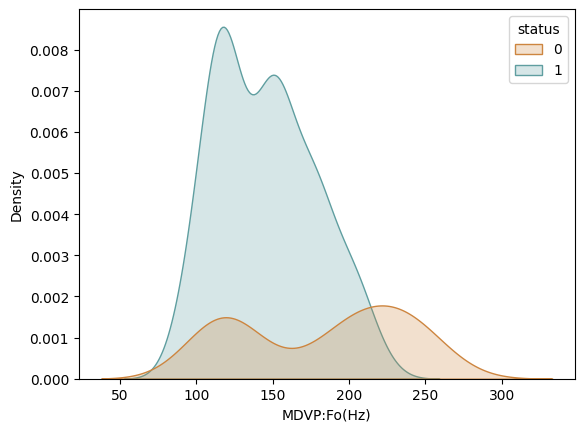

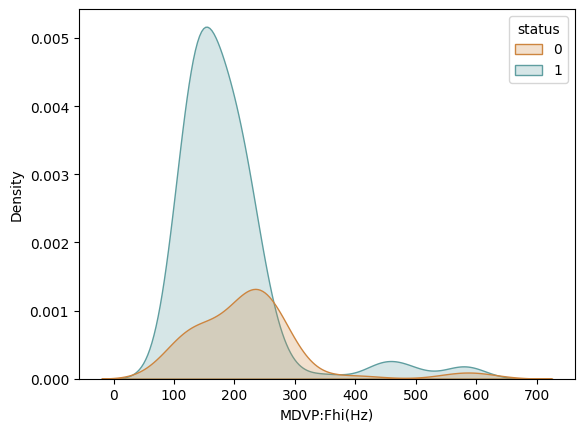

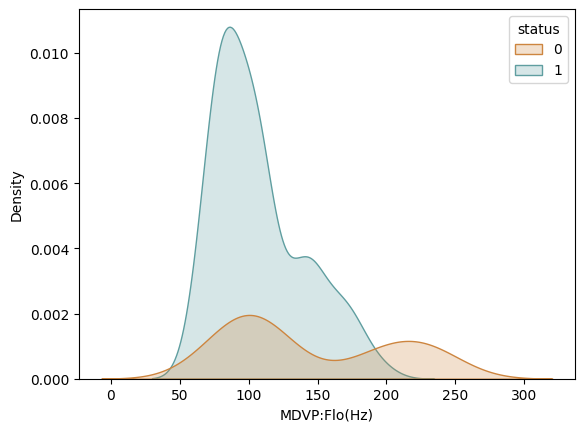

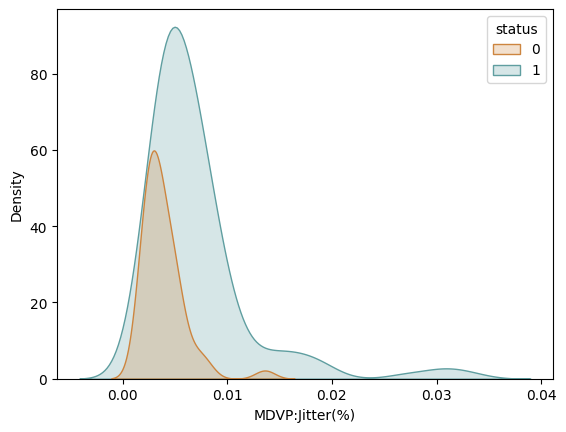

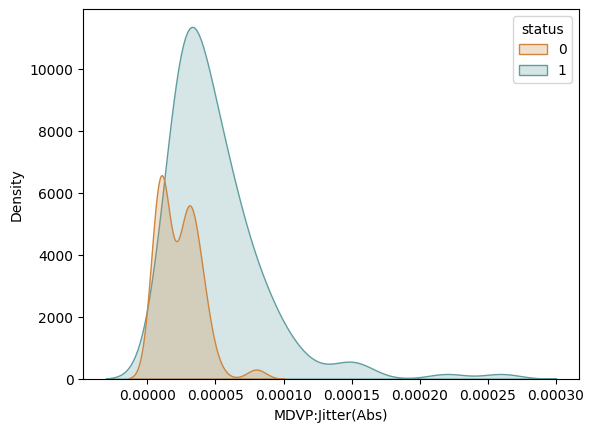

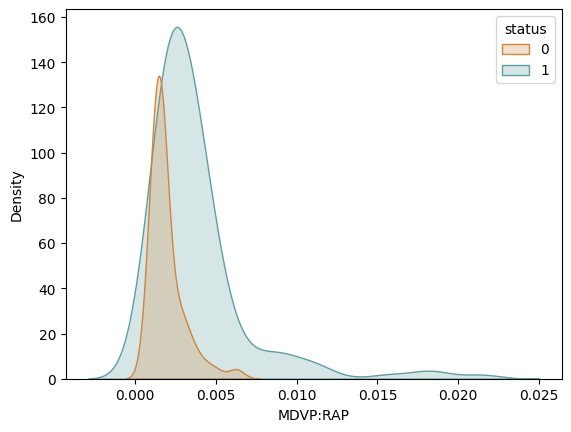

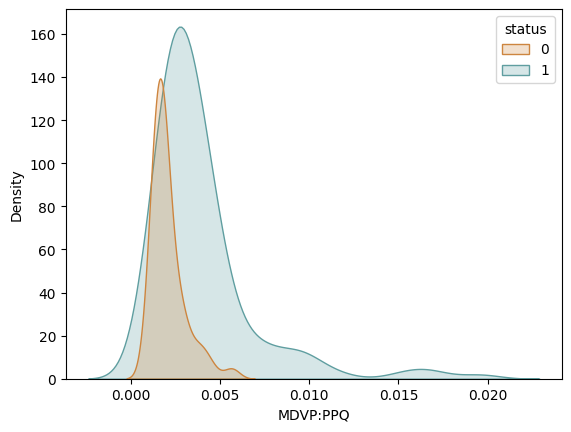

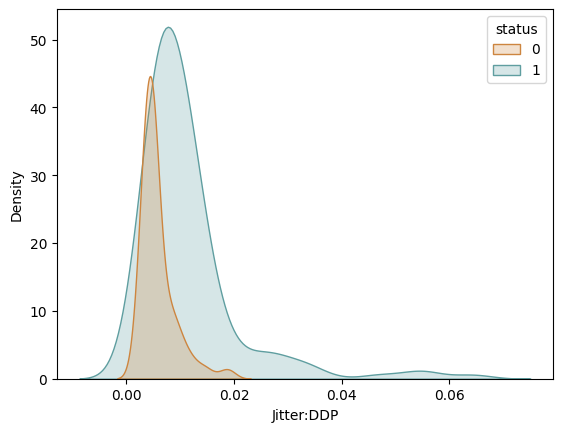

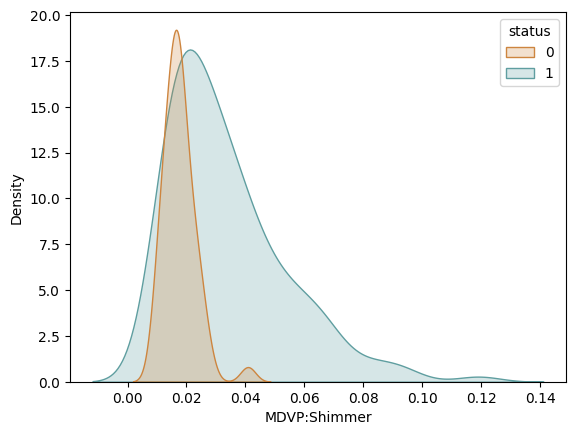

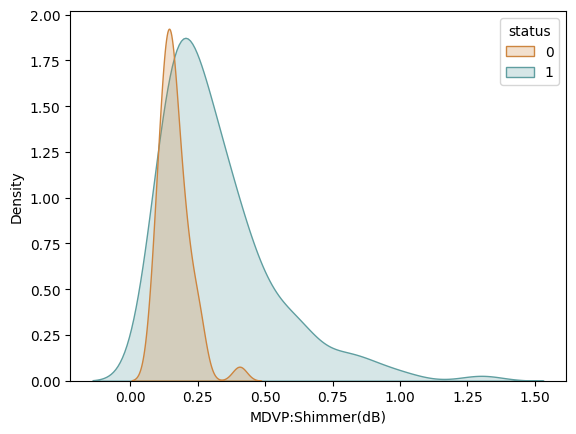

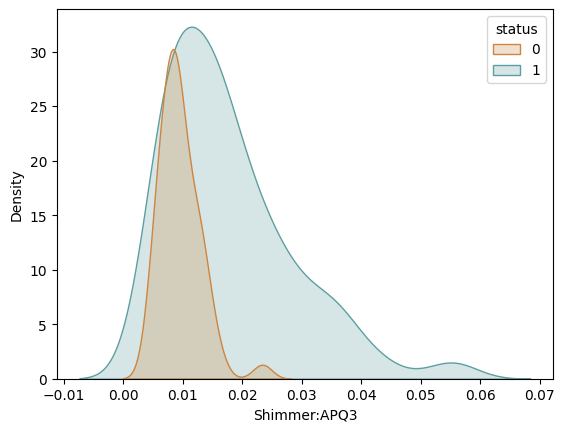

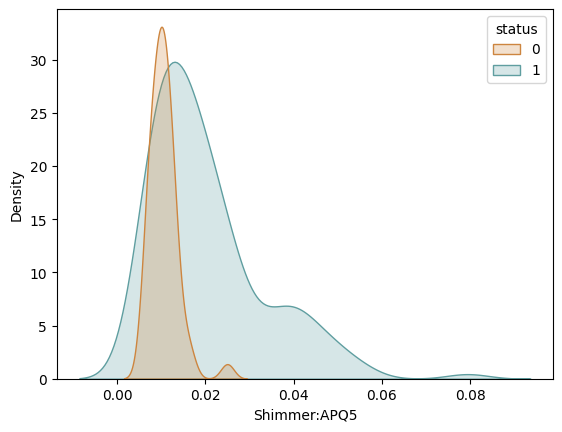

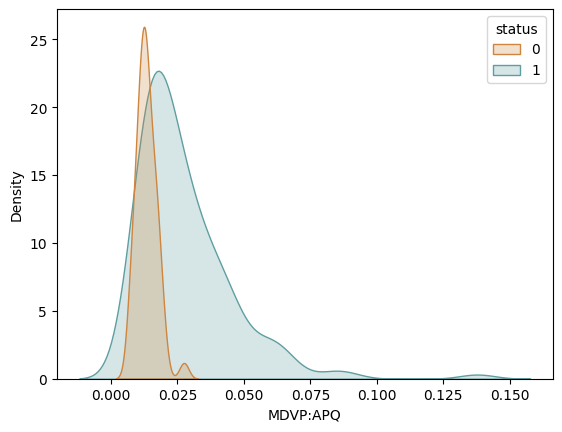

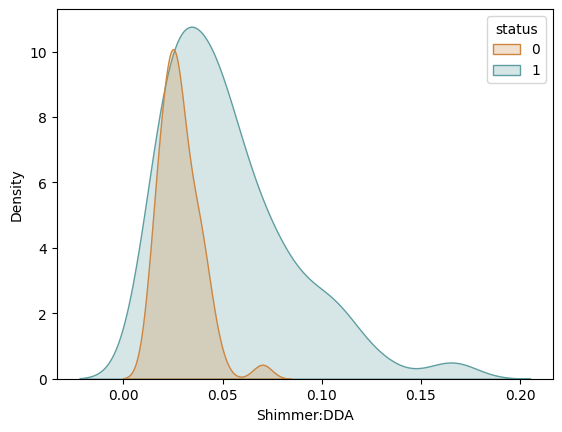

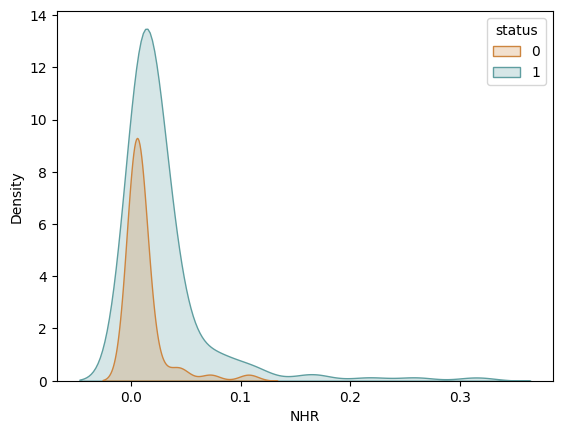

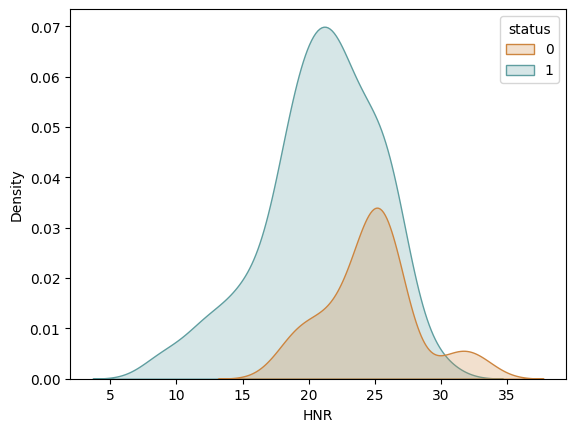

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11196\969982277.py:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=num_dataframe, x=feature, hue="status", fill=True, palette=["peru", "cadetblue"])


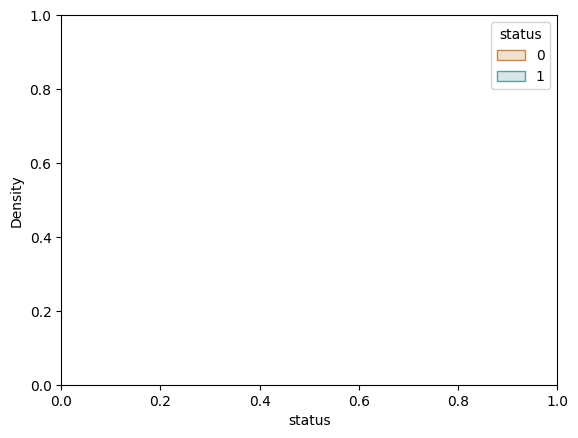

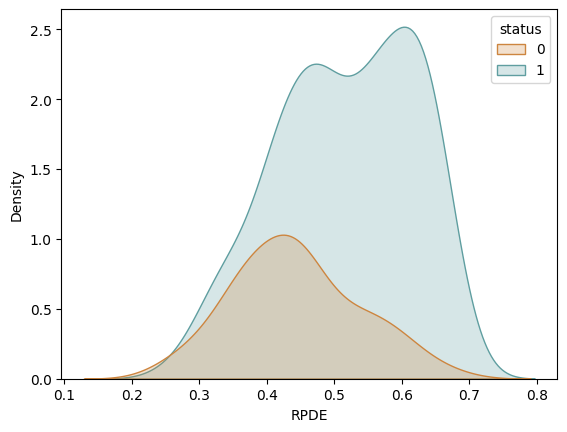

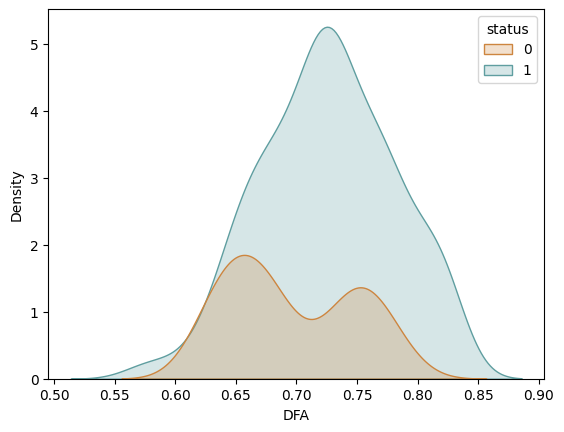

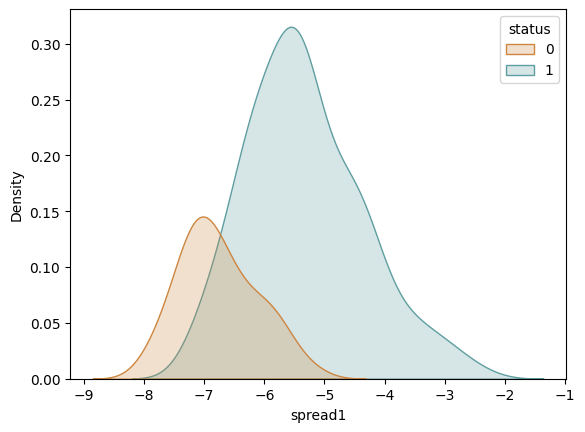

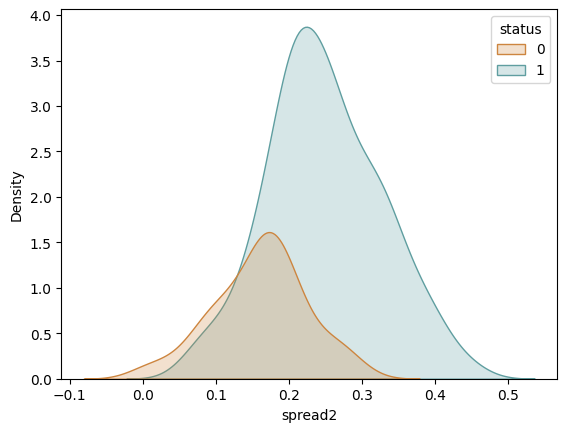

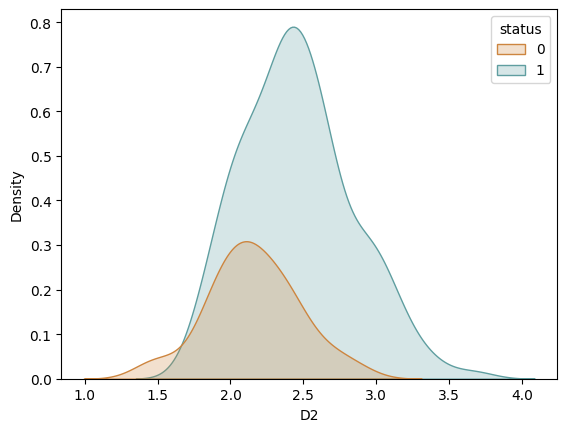

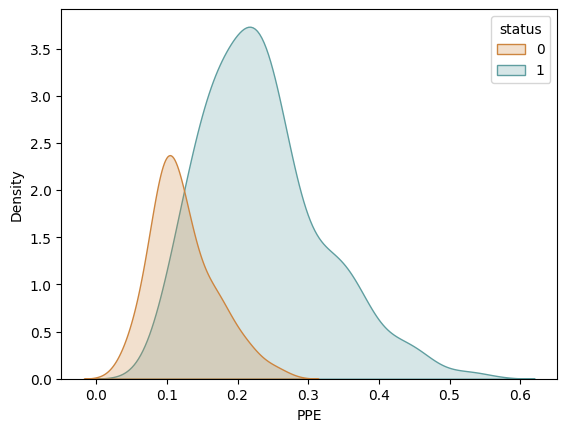

In [ ]:
# kernel density estimation for each numerical features by status
for feature in numerical_values:
    sns.kdeplot(data=num_dataframe, x=feature, hue="status", fill=True, palette=["peru", "cadetblue"])
    plt.show()

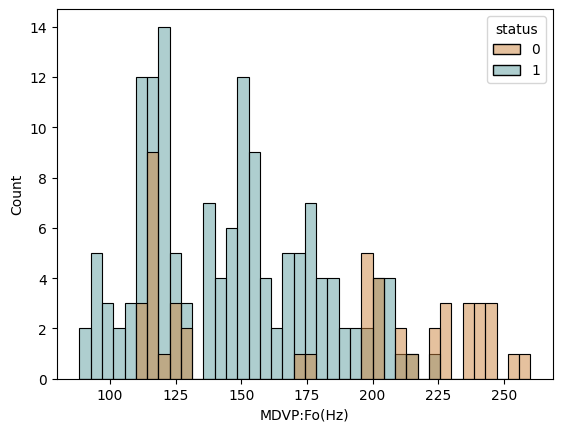

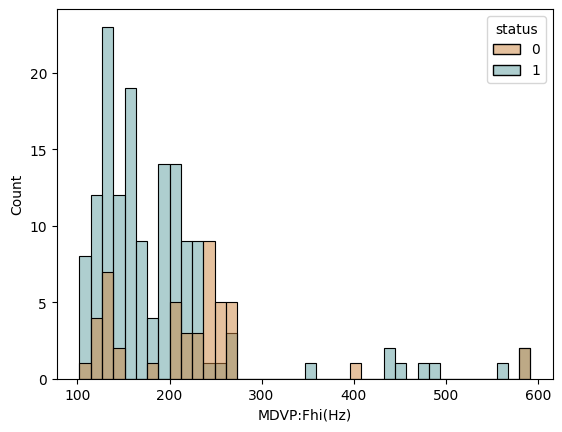

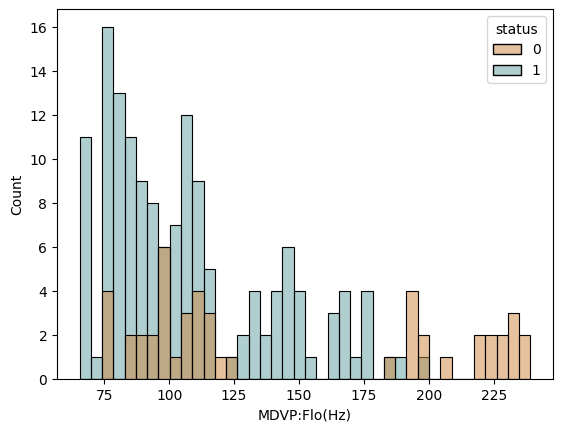

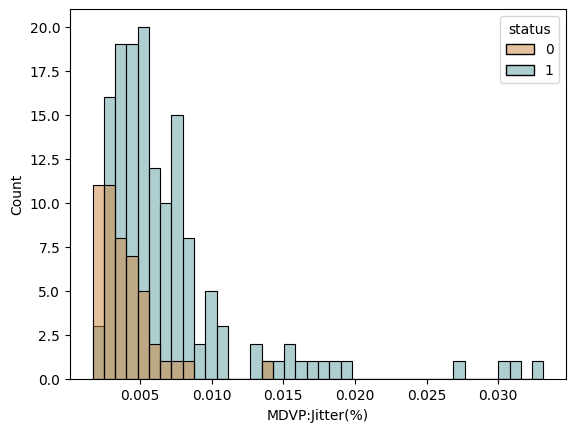

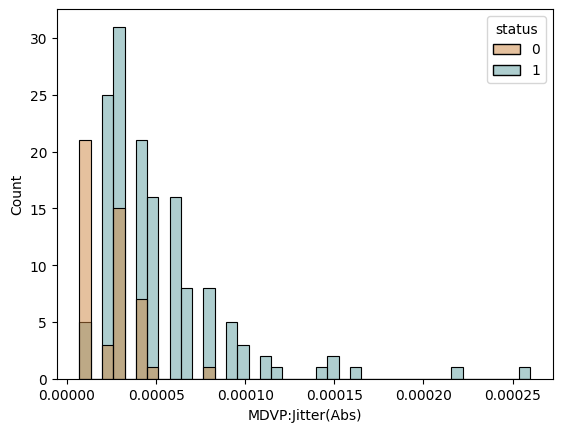

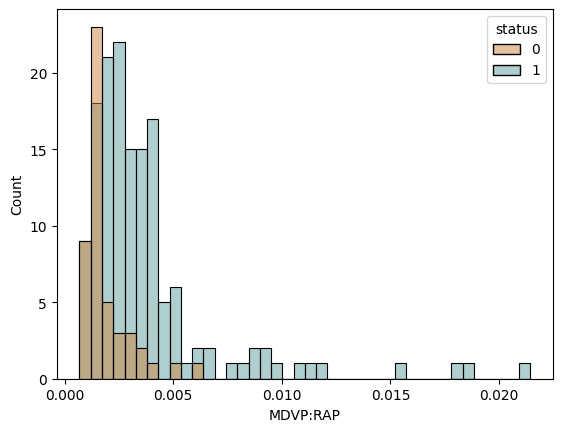

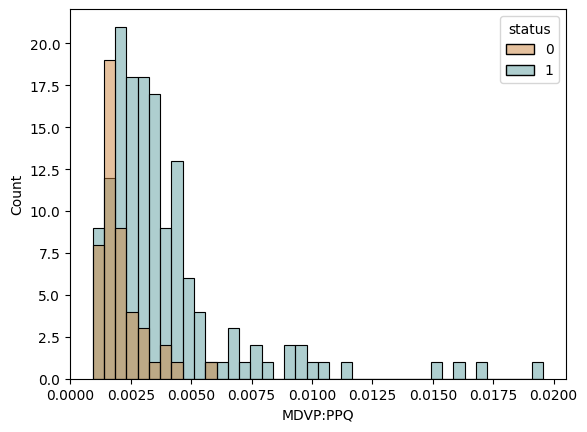

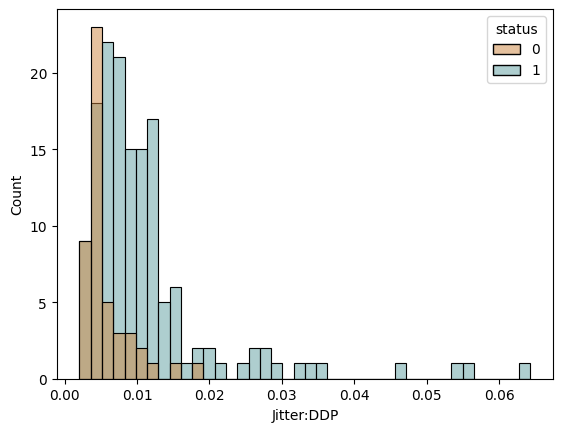

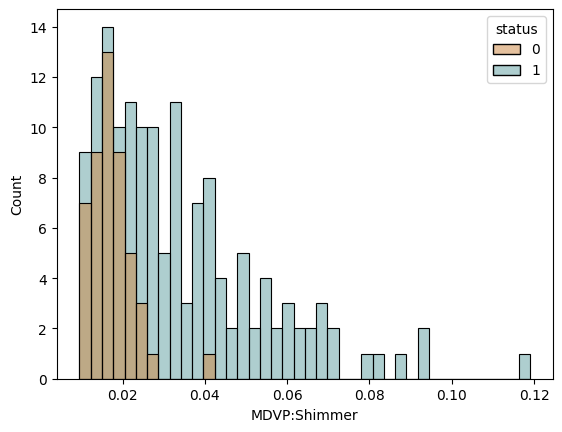

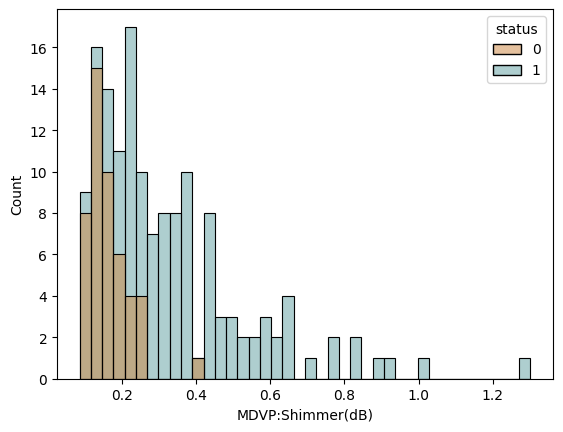

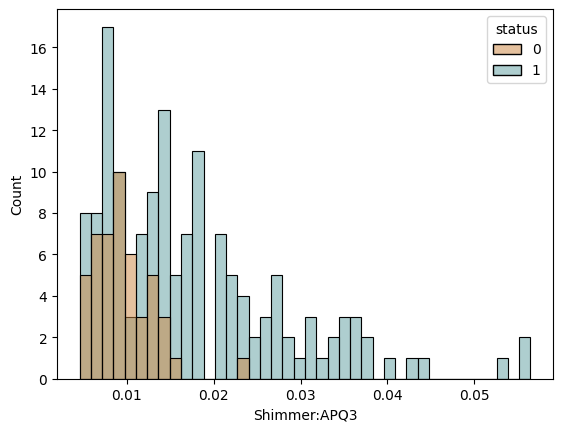

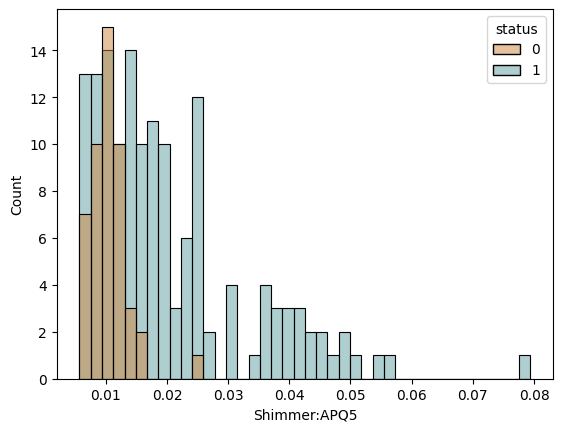

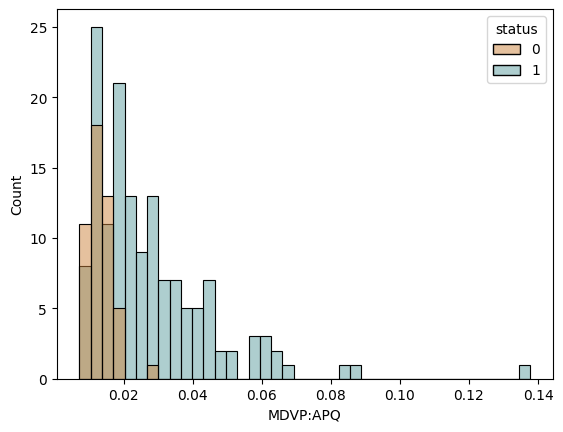

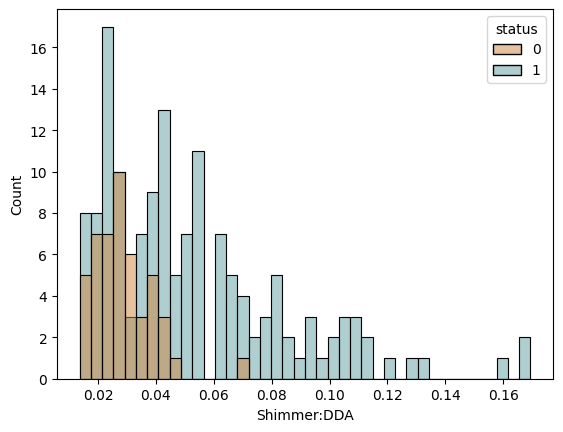

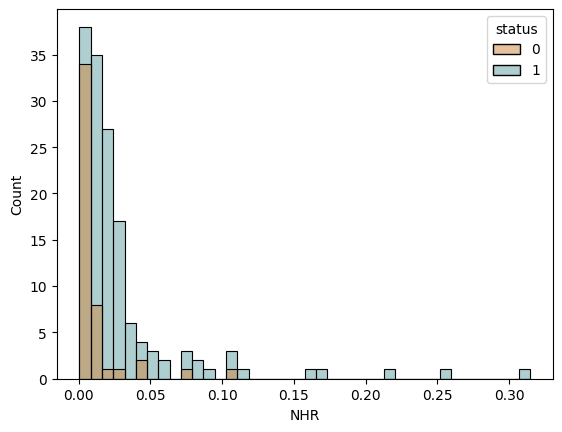

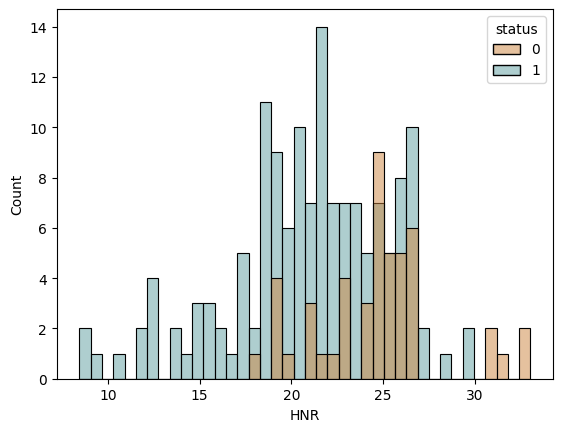

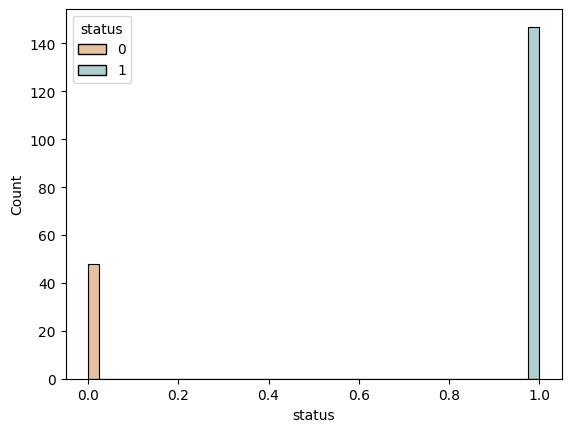

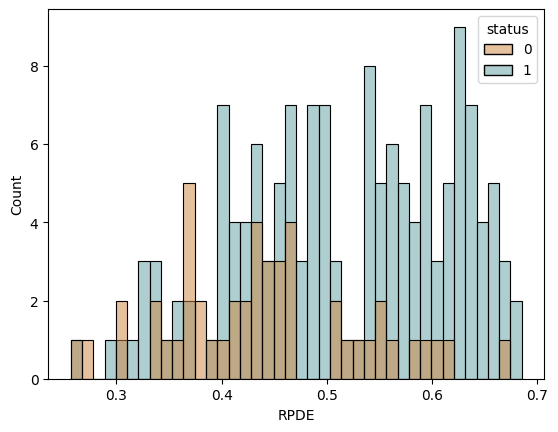

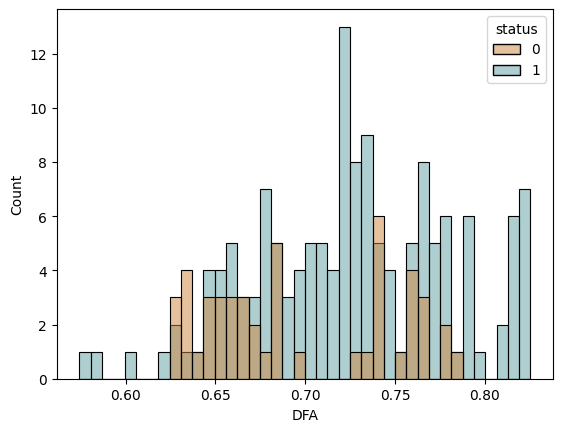

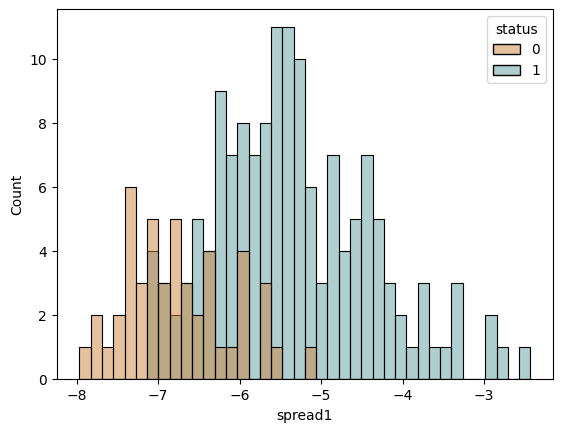

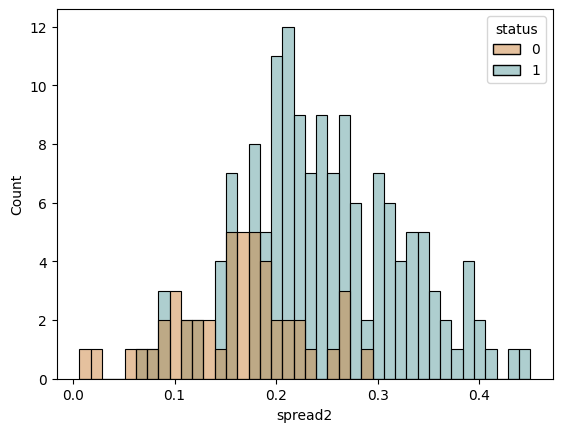

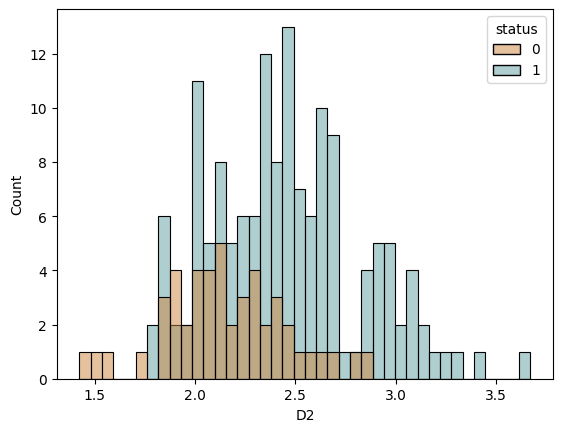

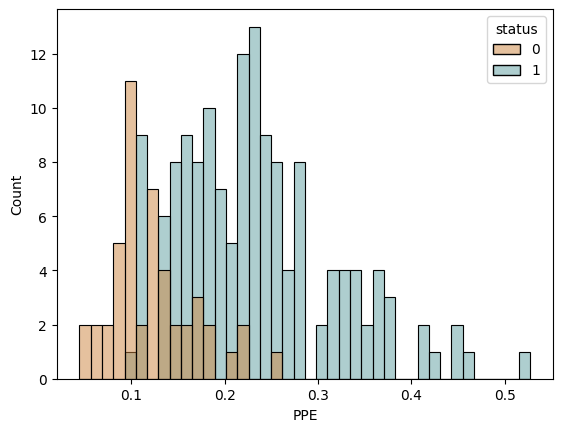

In [83]:
#histograms for each numerical features by status
for label in numerical_values:
    sns.histplot(data=num_dataframe, bins=40, hue="status", palette=["peru", "cadetblue"], x=label, fill=True)
    plt.show()

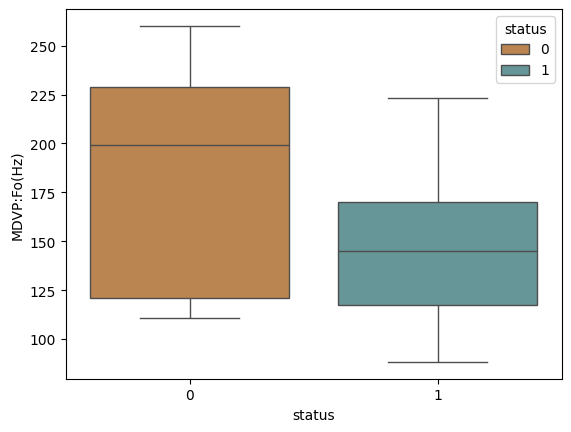

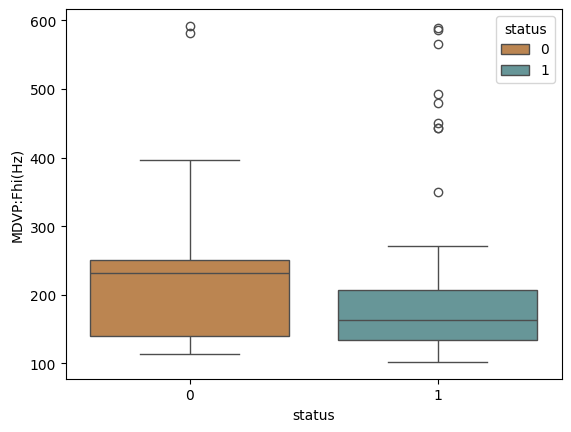

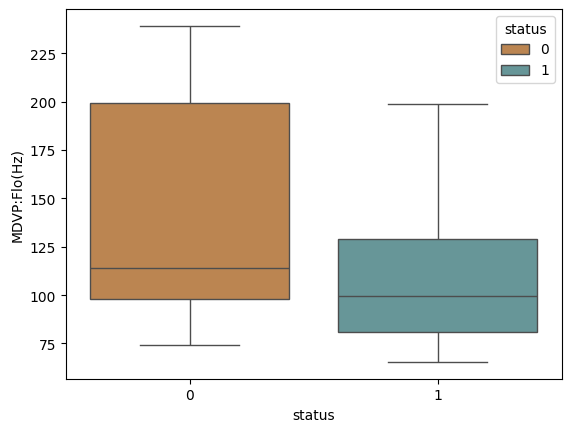

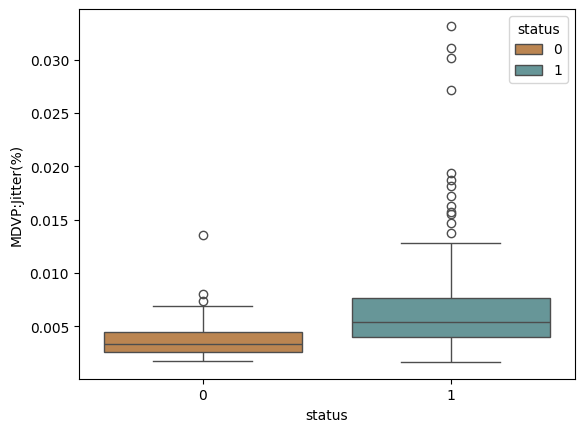

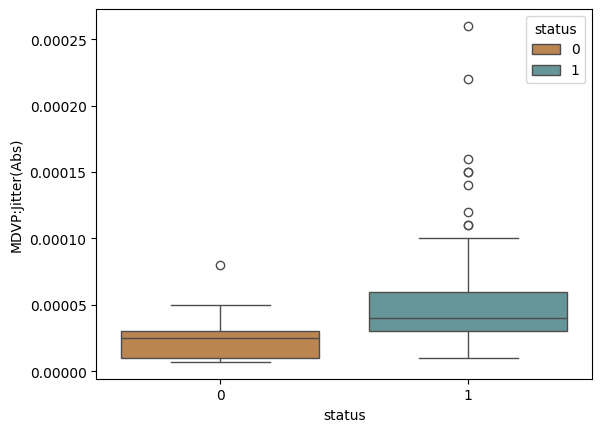

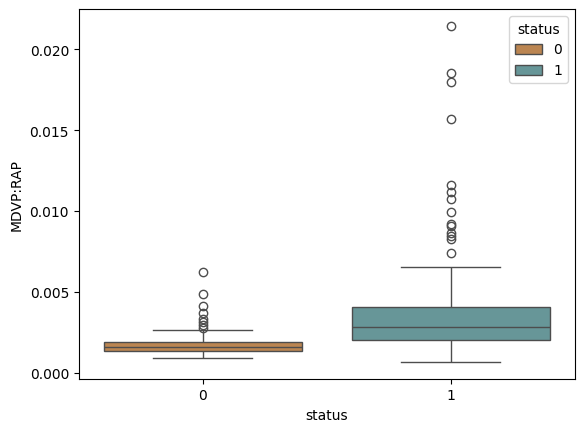

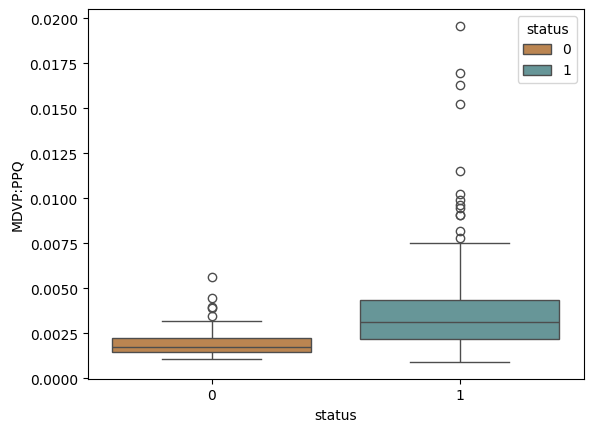

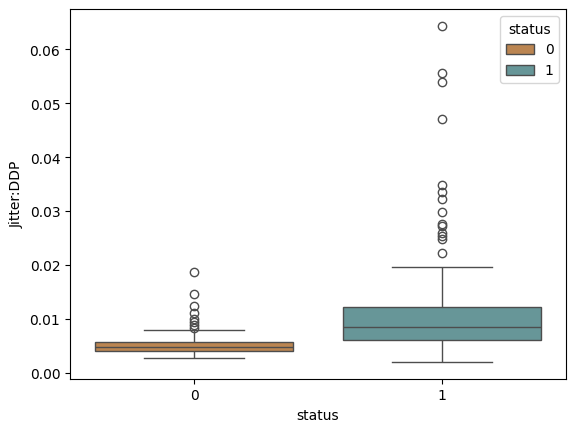

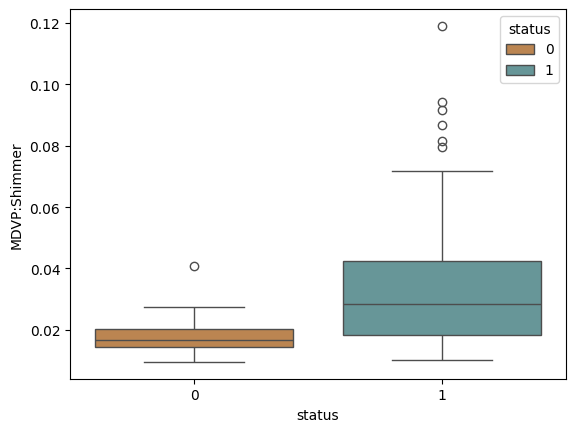

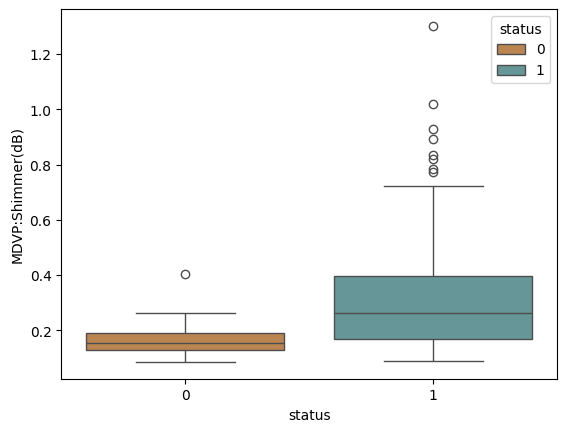

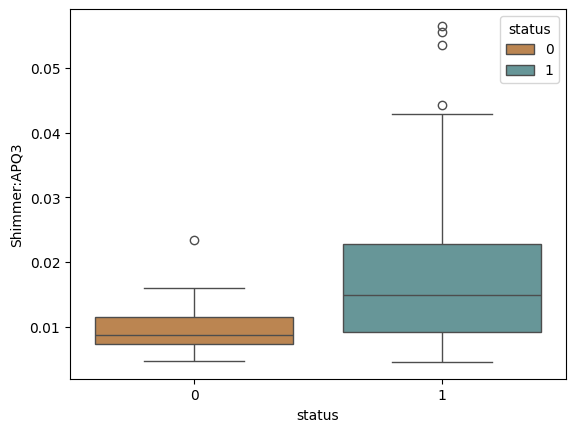

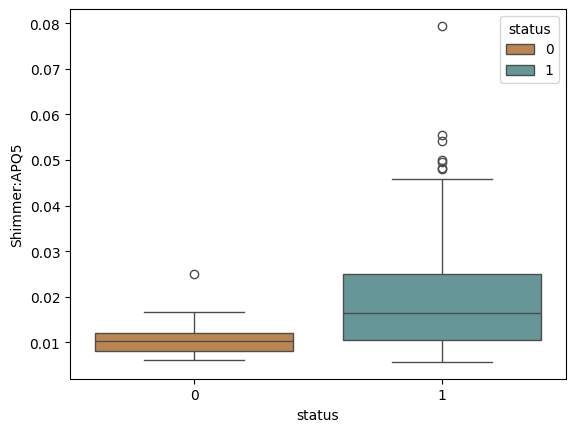

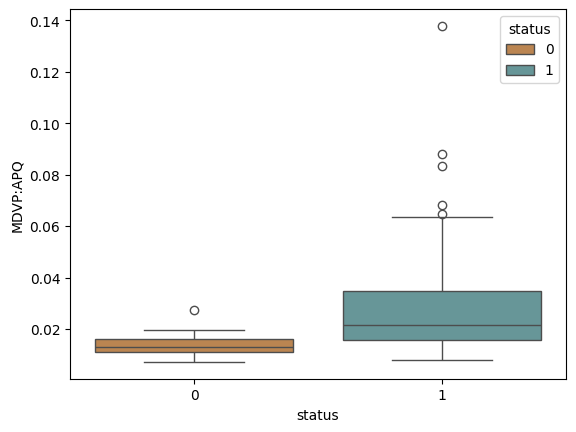

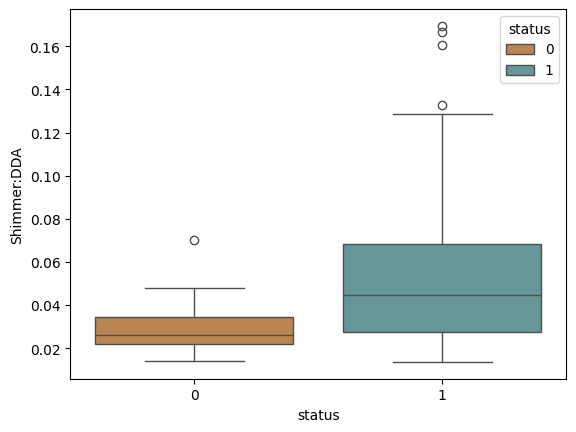

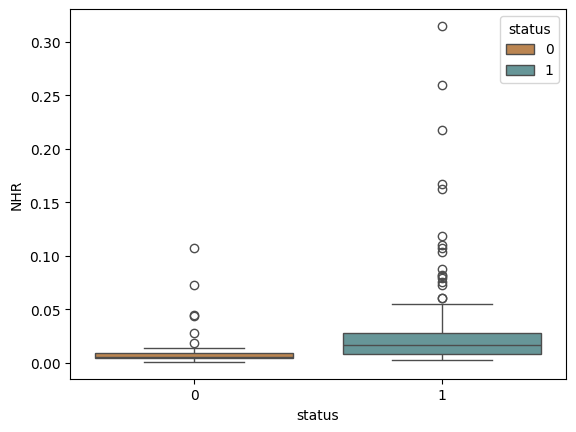

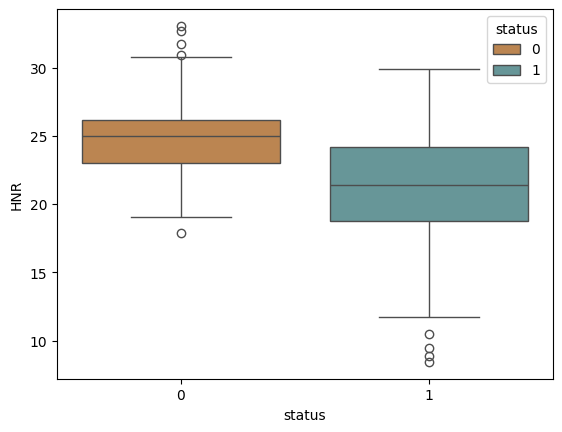

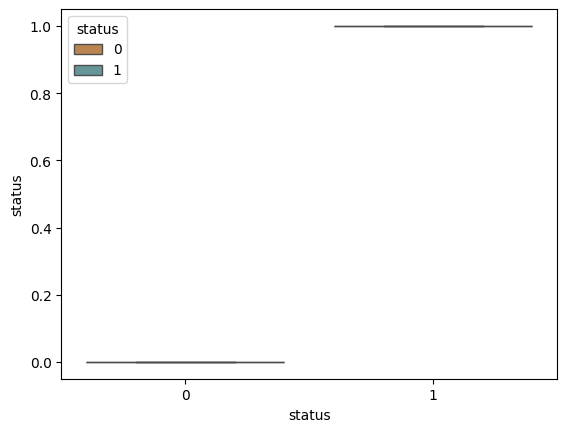

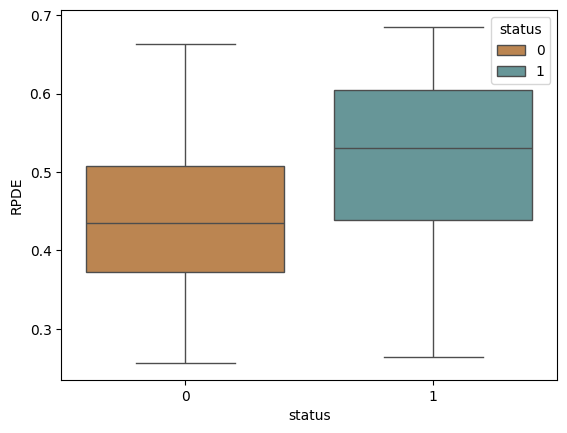

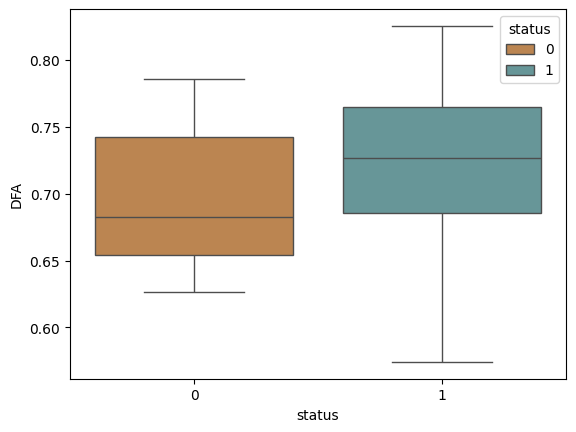

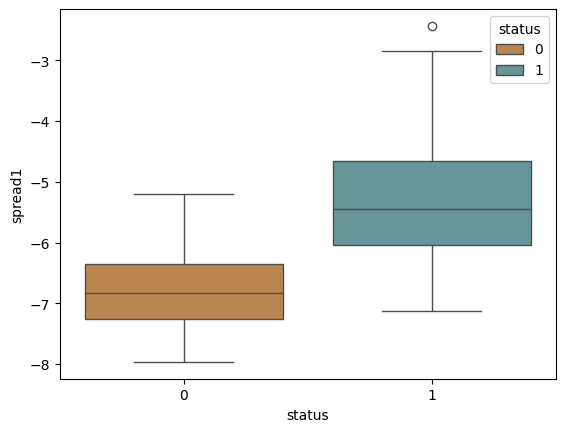

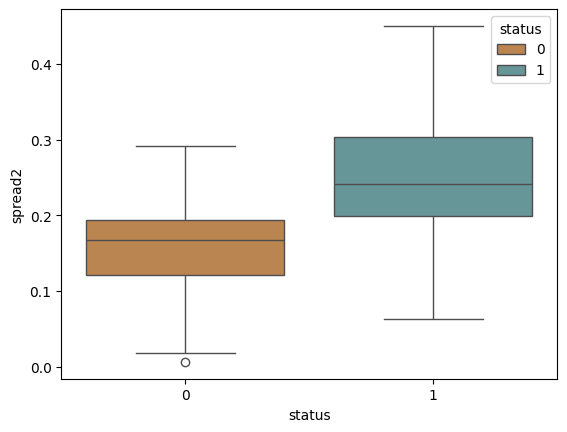

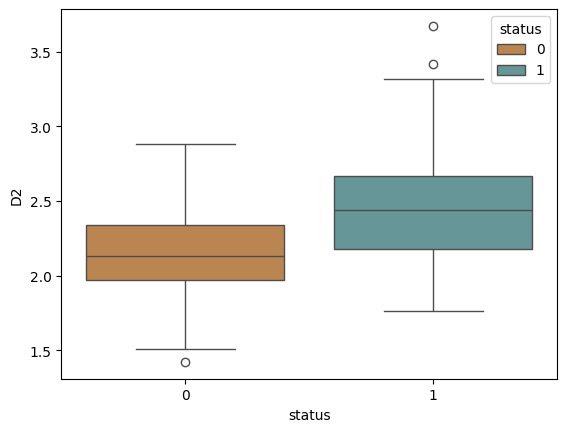

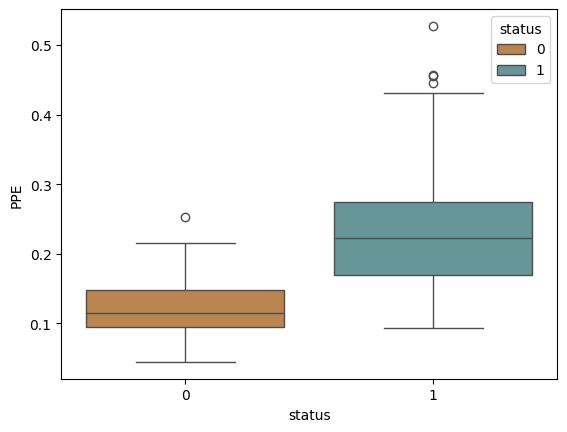

In [84]:
#boxplots for each numerical features by status
for item in numerical_values:
    sns.boxplot(data=num_dataframe, x="status", y=num_dataframe[item], hue="status", palette=["peru", "cadetblue"])
    plt.show()

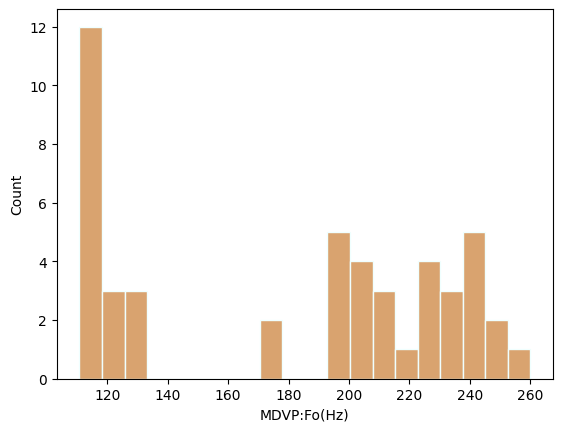

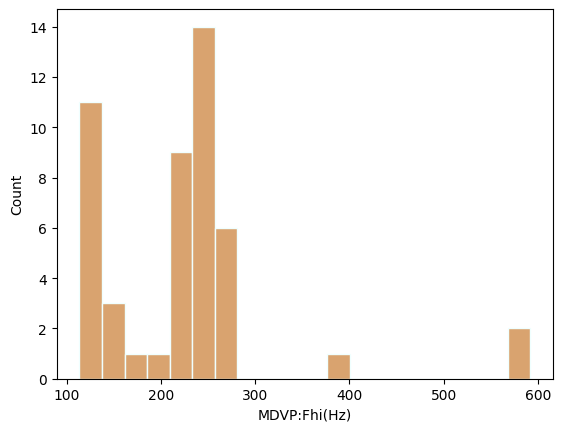

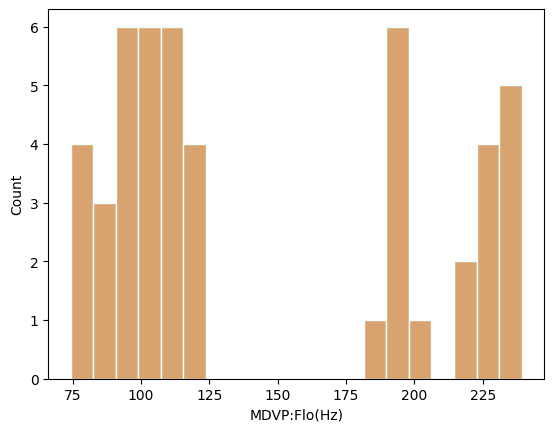

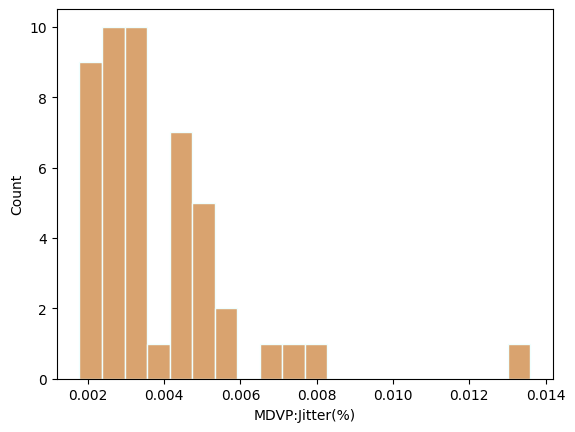

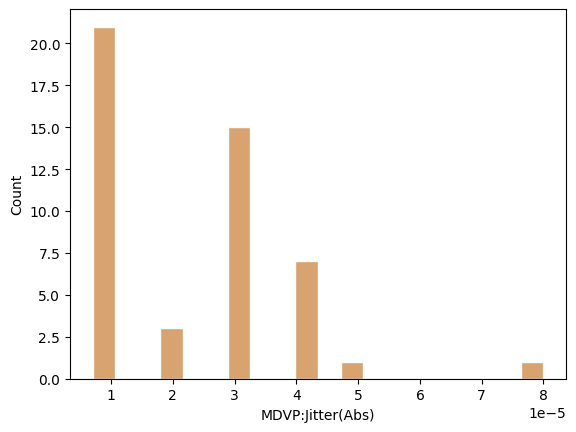

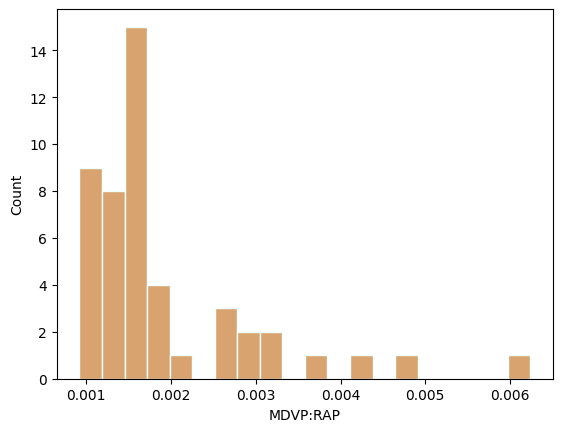

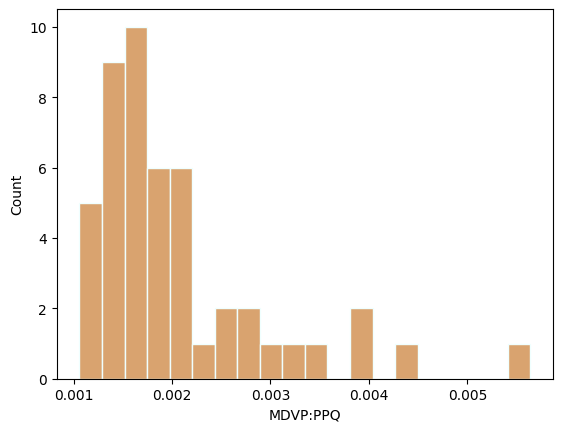

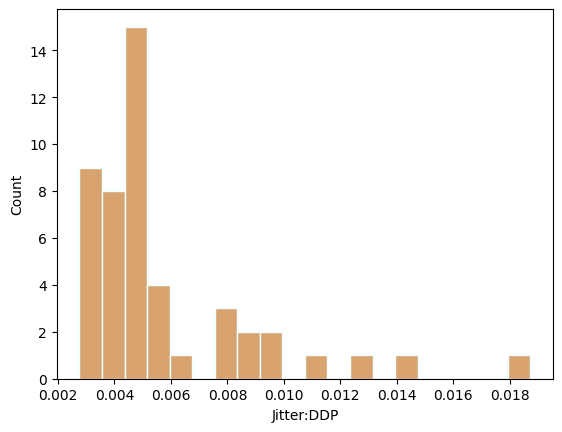

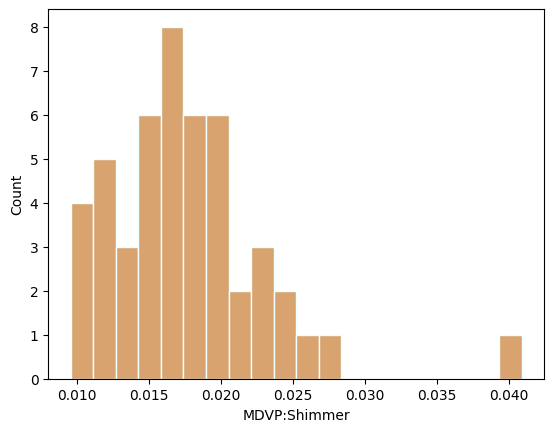

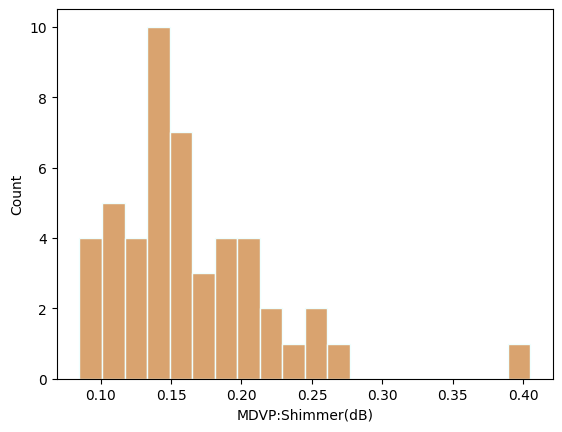

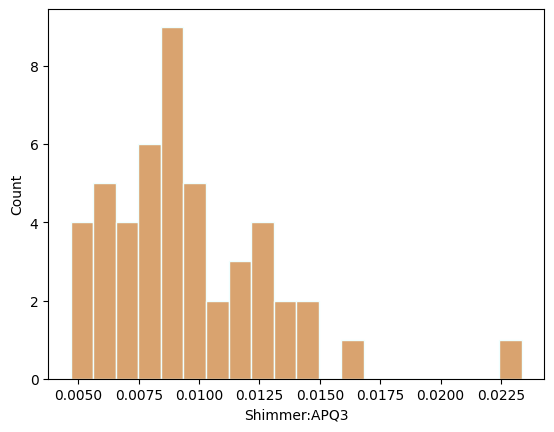

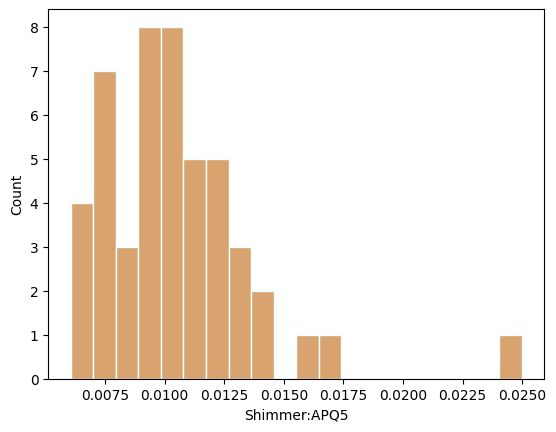

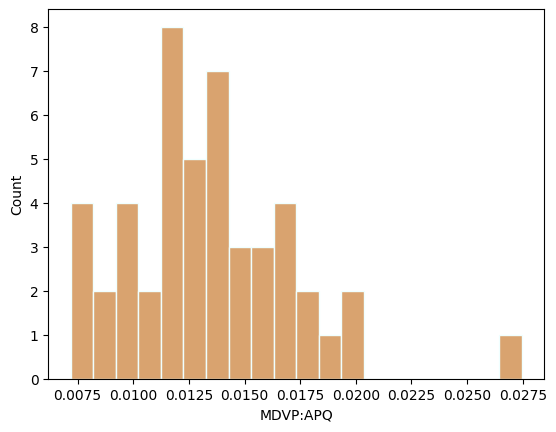

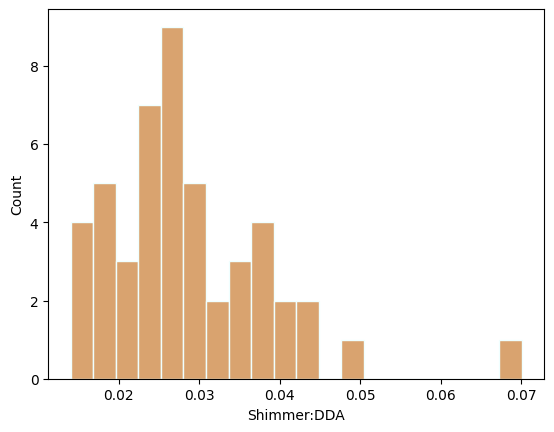

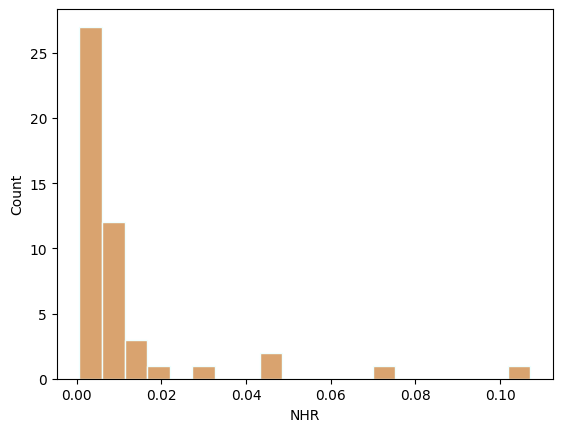

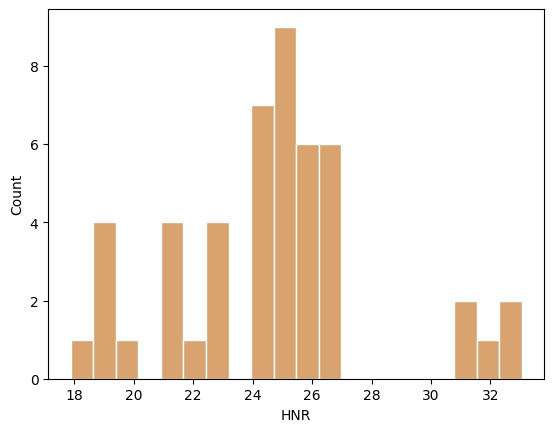

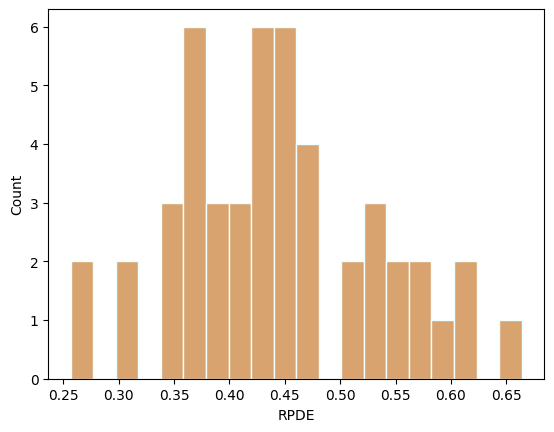

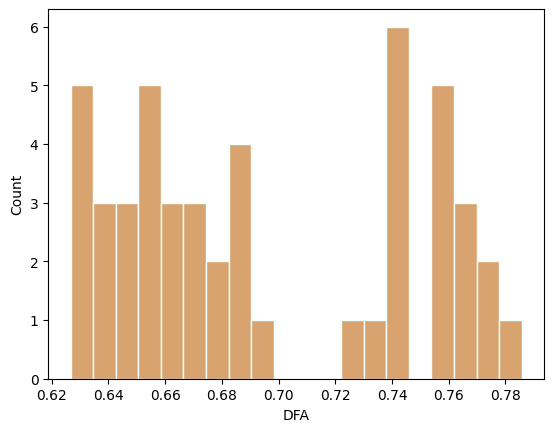

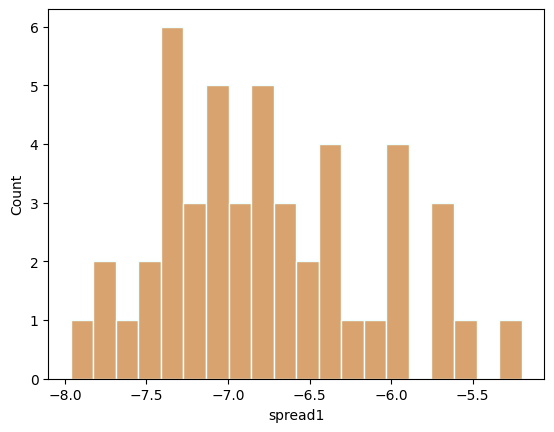

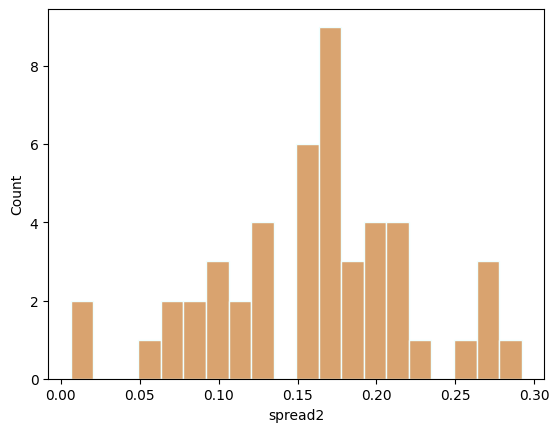

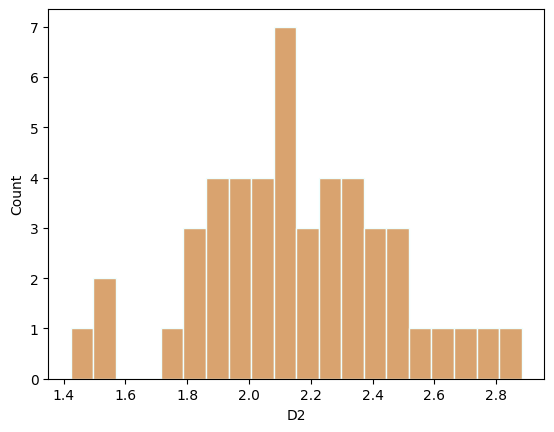

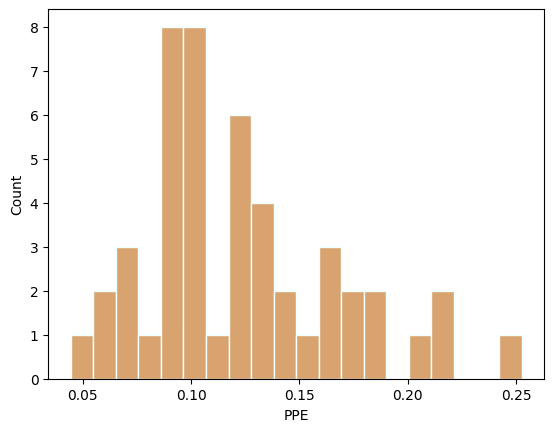

In [ ]:
#histograms for healthy status
for label in healthy_features:
    sns.histplot(data=healthy_df, x=label, bins=20, fill=True, color="peru", edgecolor="azure")
    plt.show()

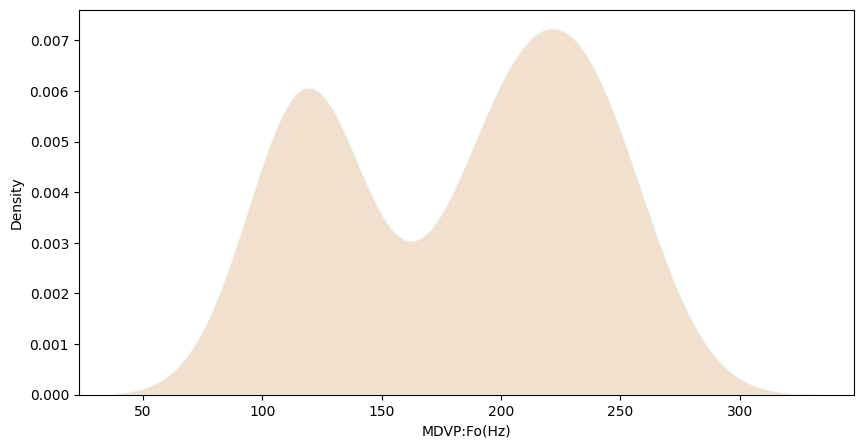

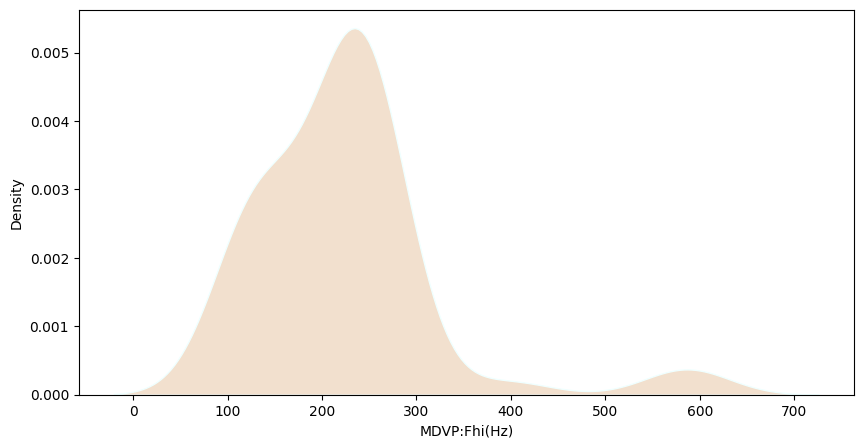

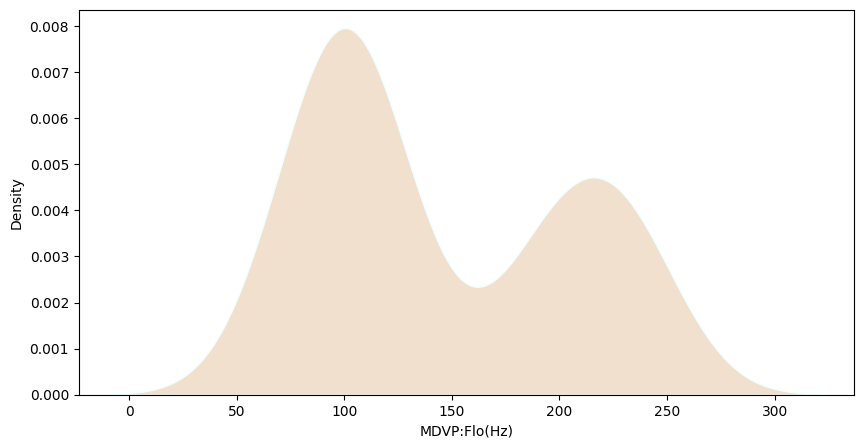

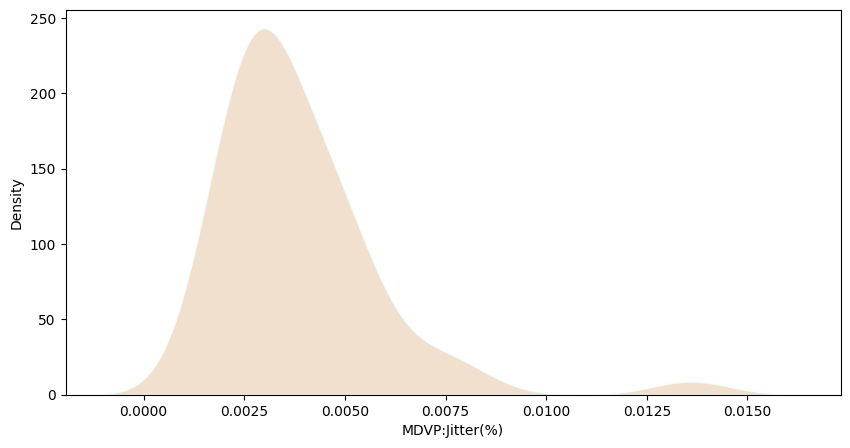

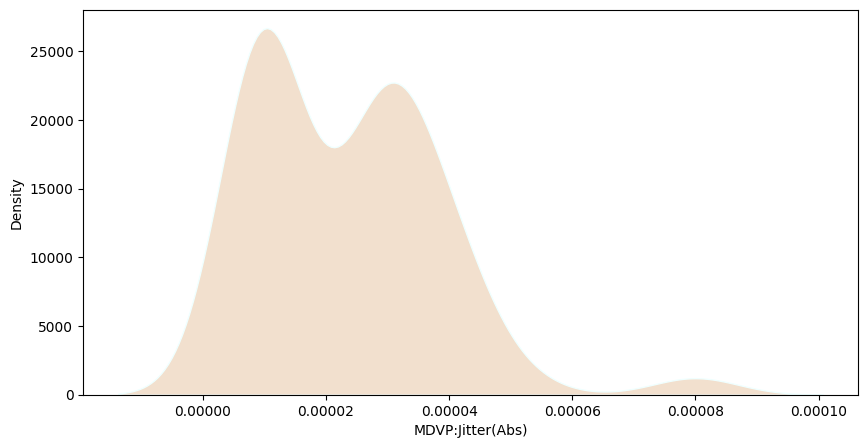

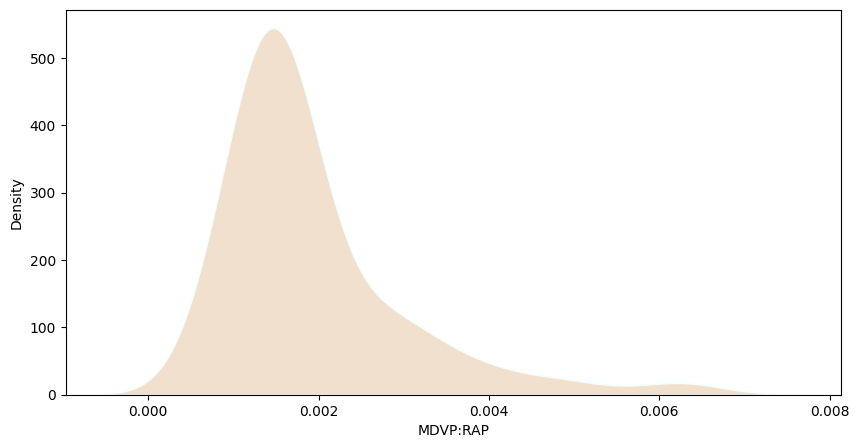

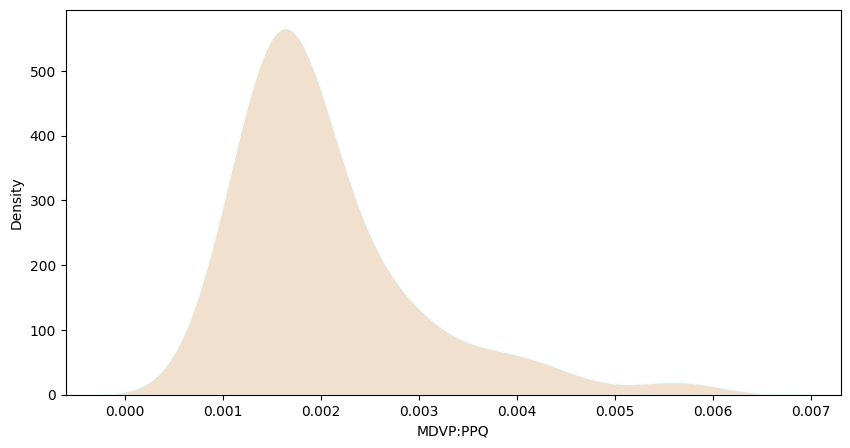

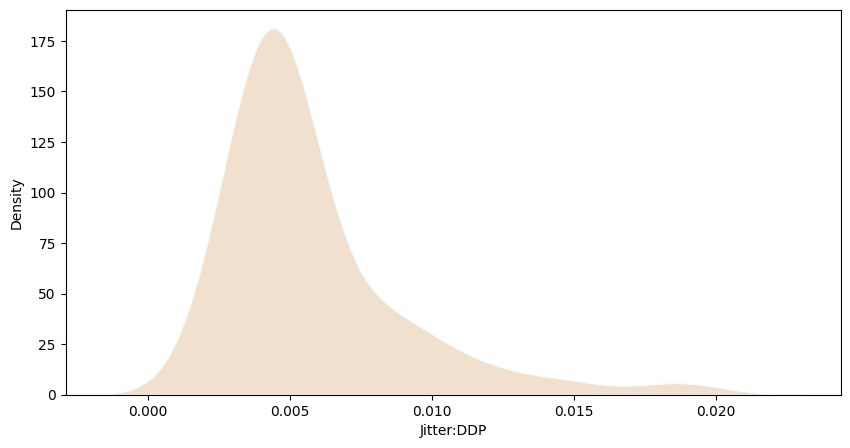

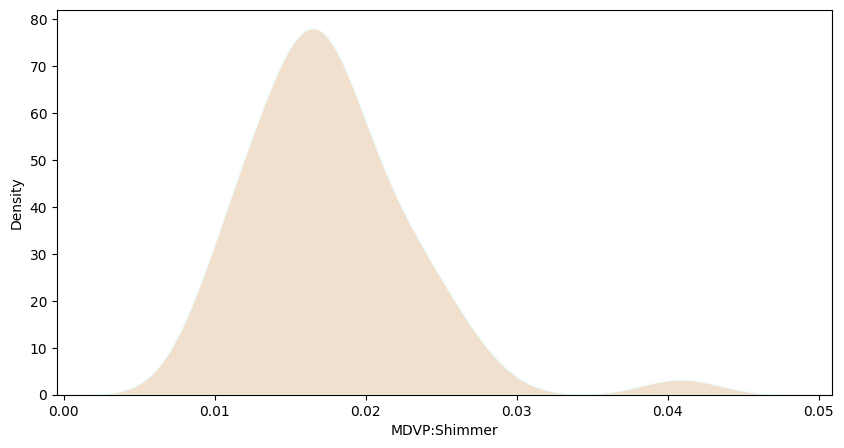

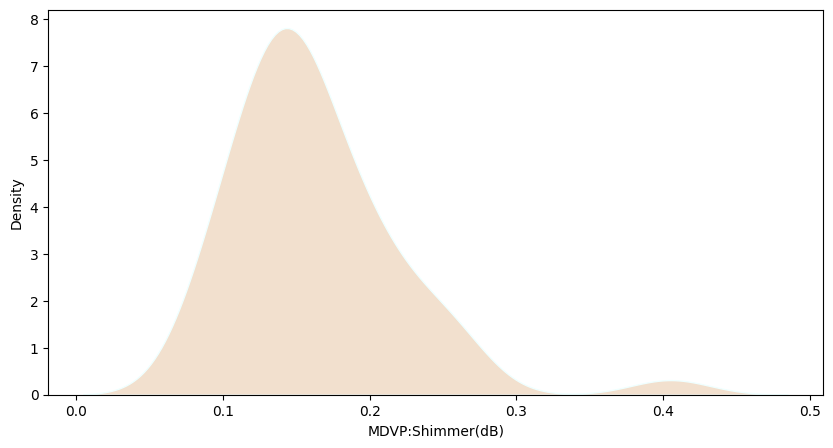

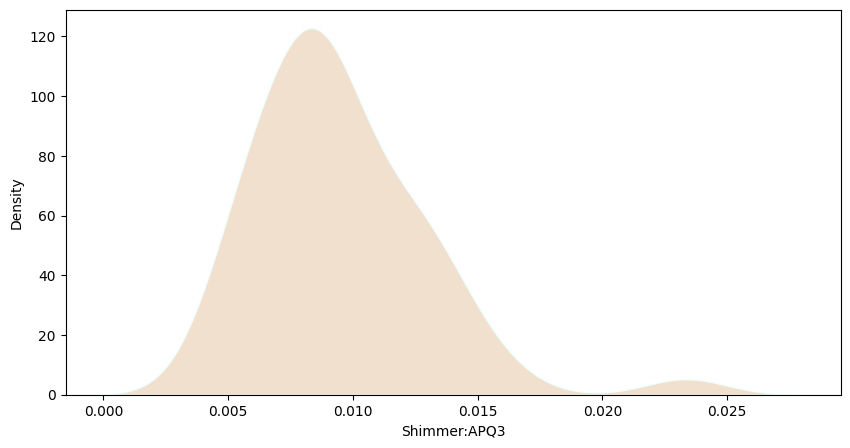

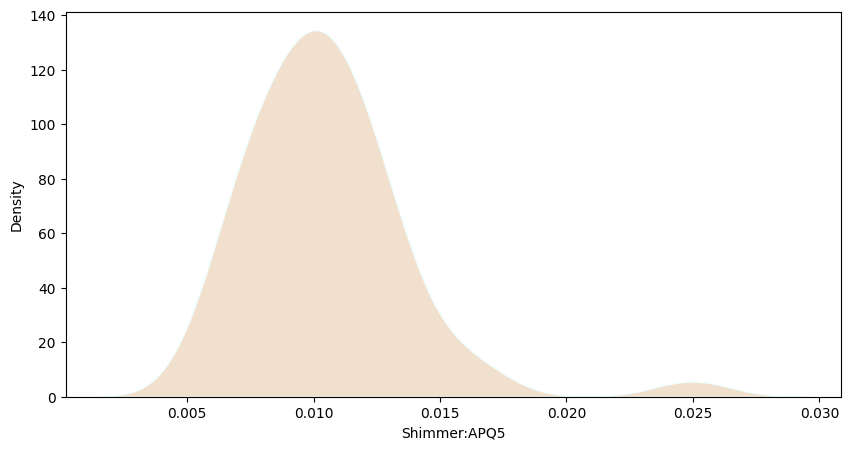

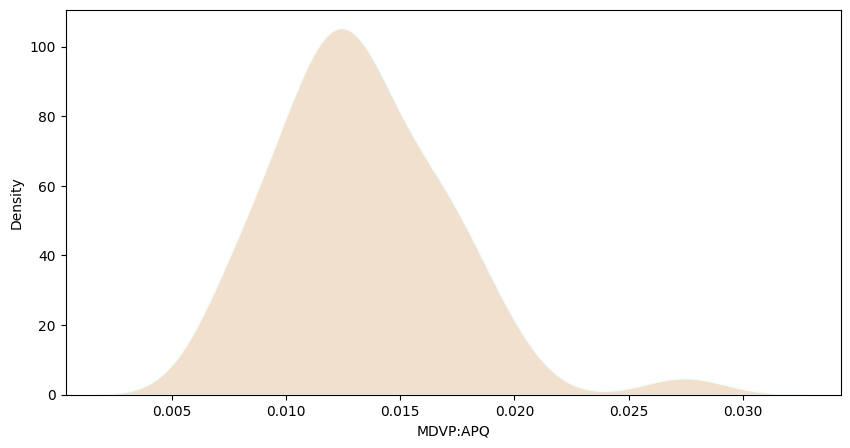

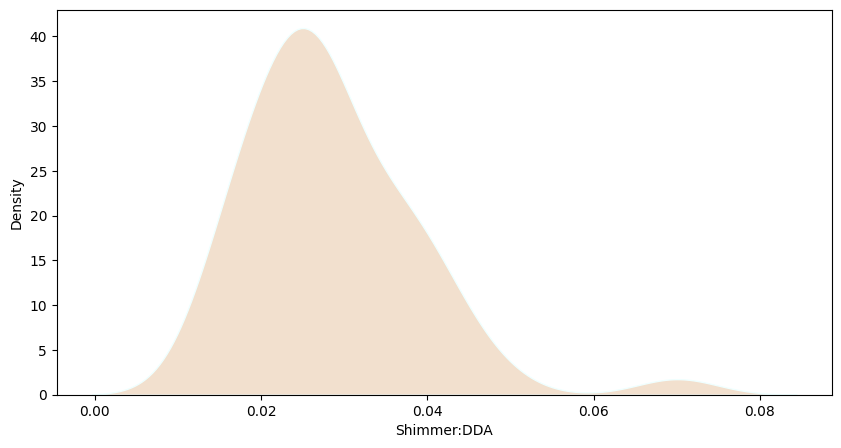

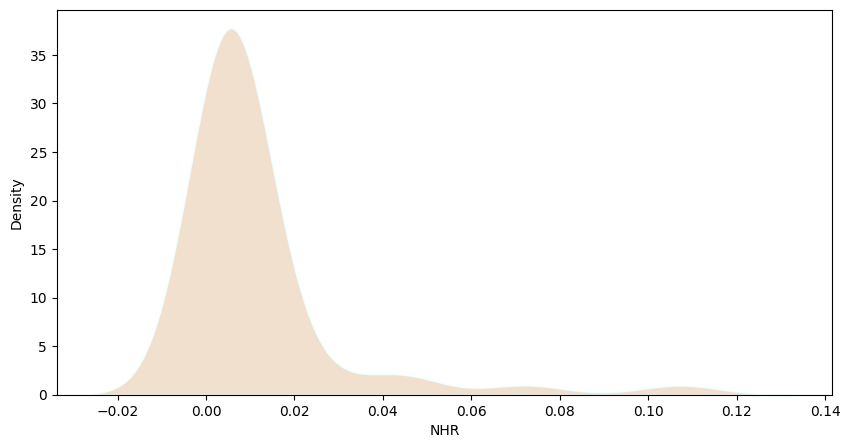

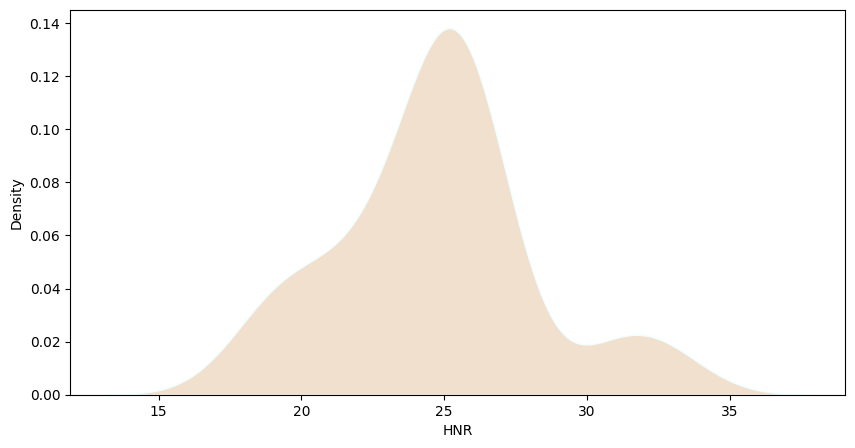

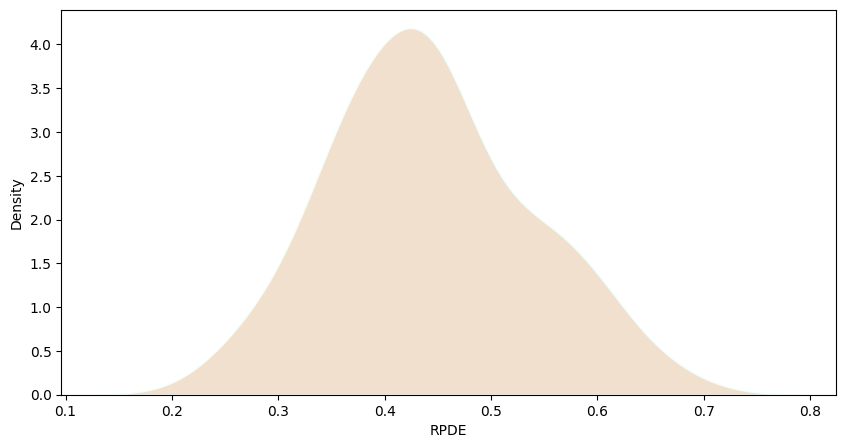

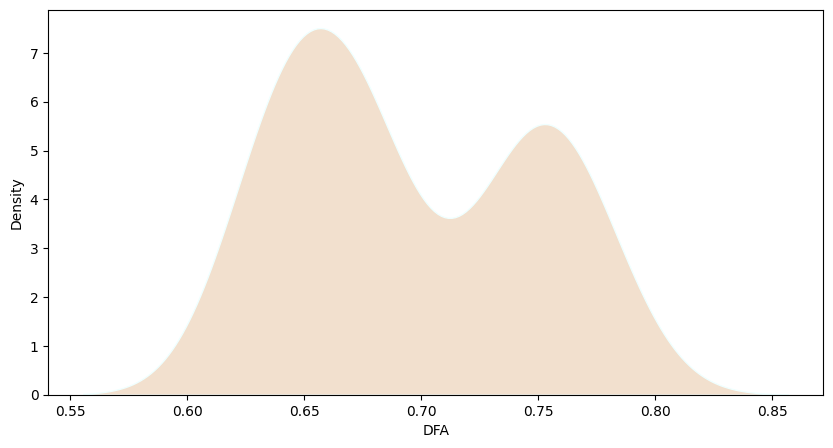

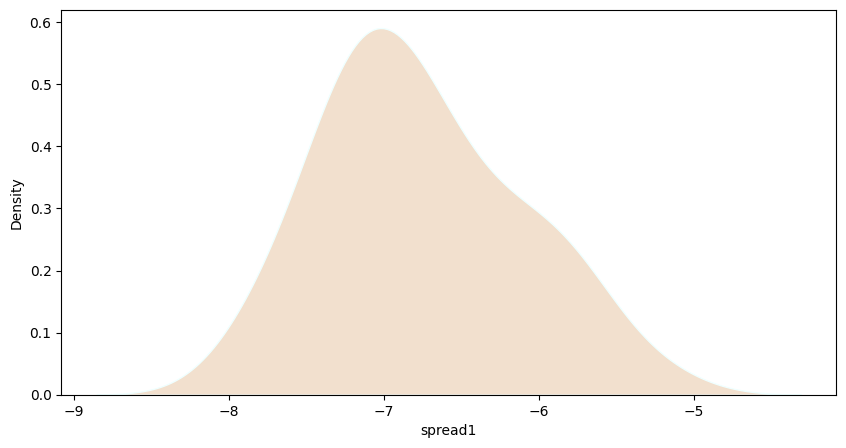

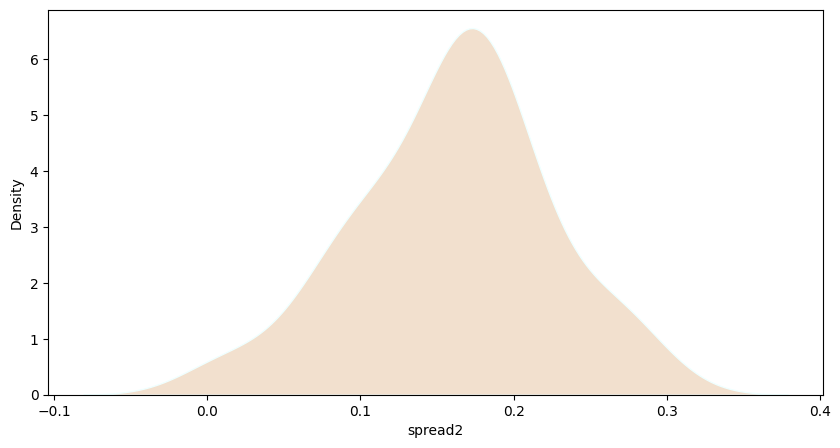

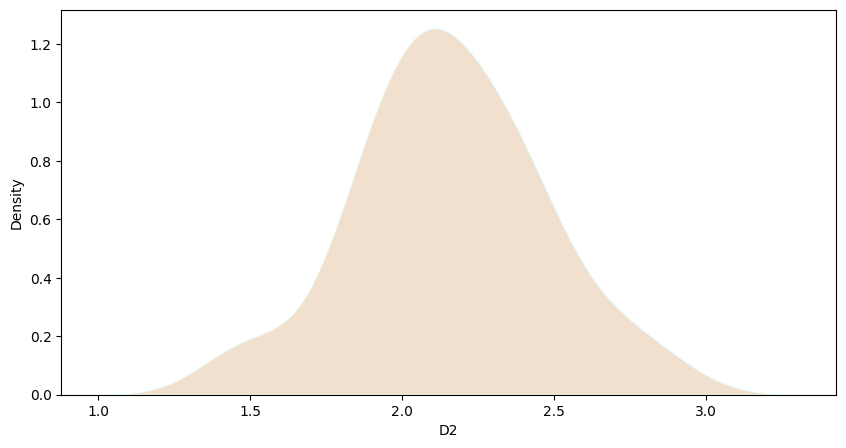

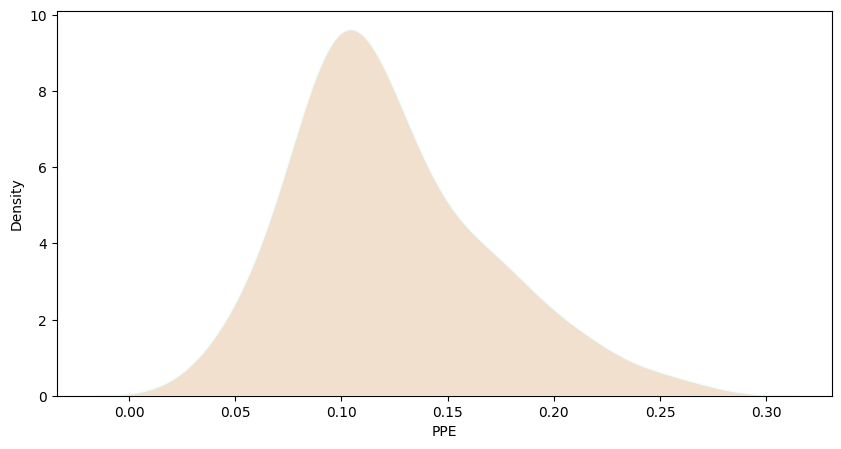

In [ ]:
#kernel density estimation for healthy status
for labels in healthy_features:
    plt.figure(figsize=(10, 5))
    sns.kdeplot(data=healthy_df, x=labels, fill=True, color="peru", edgecolor="azure")
    plt.show()

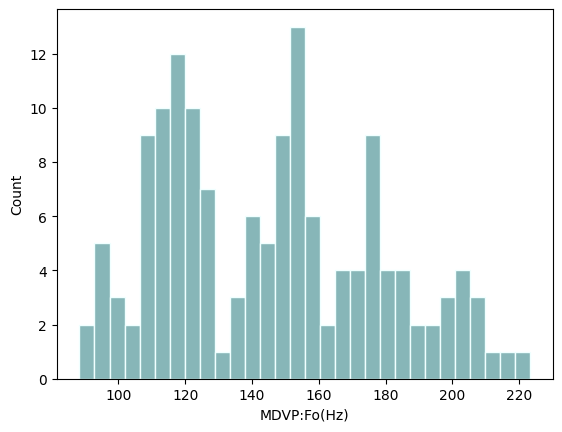

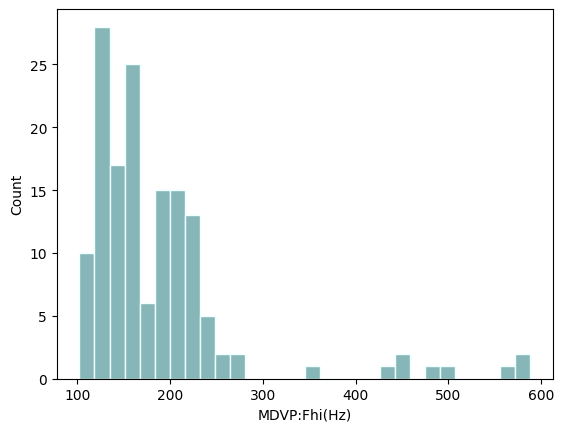

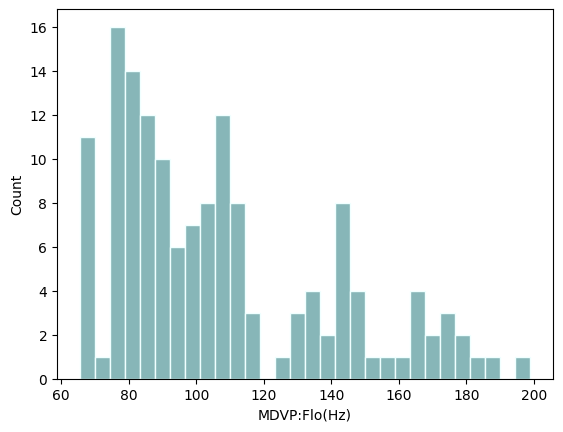

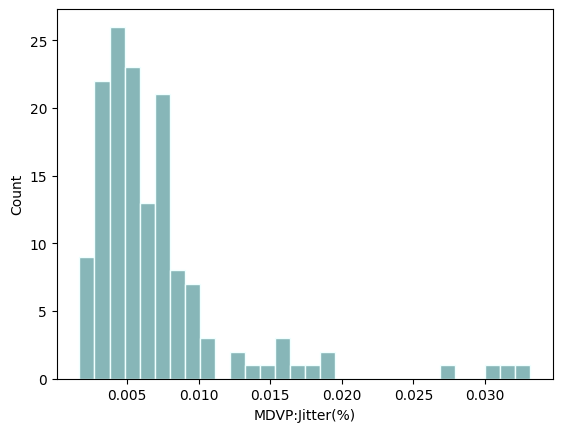

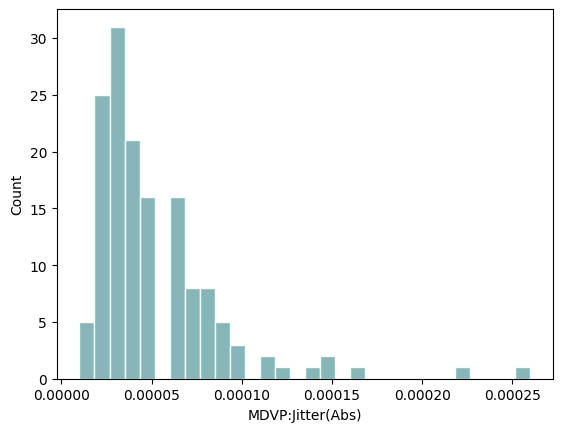

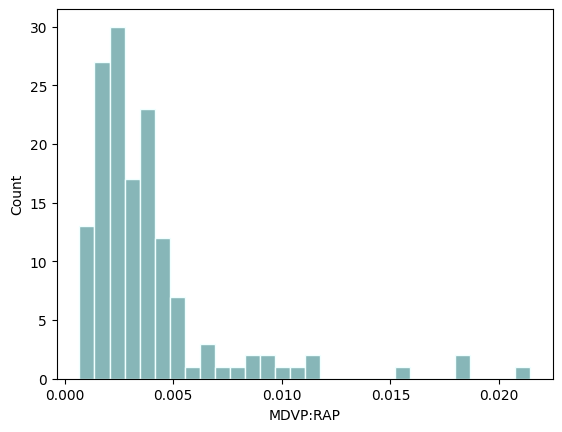

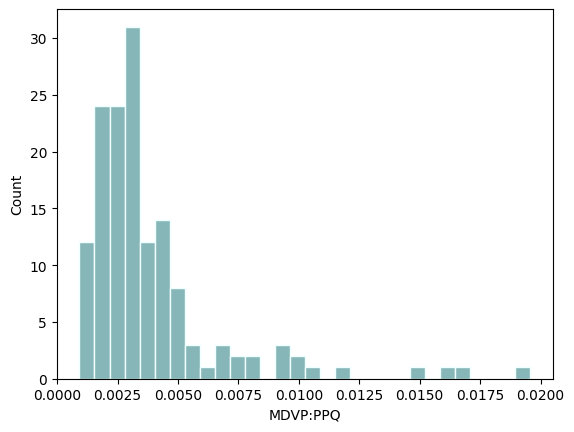

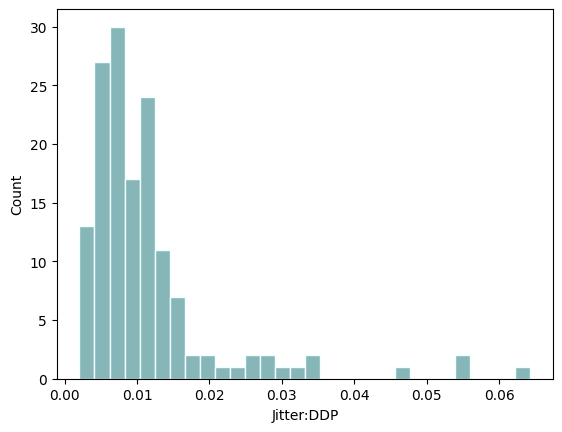

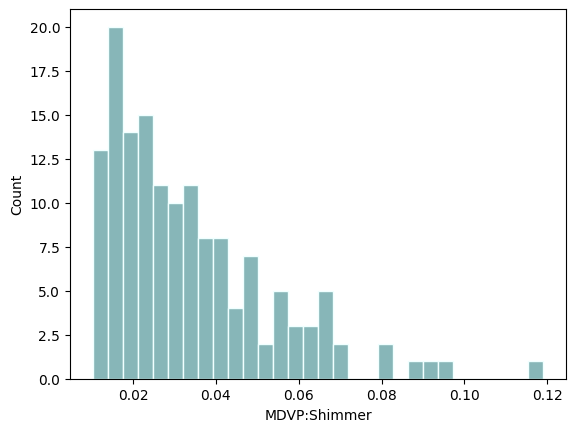

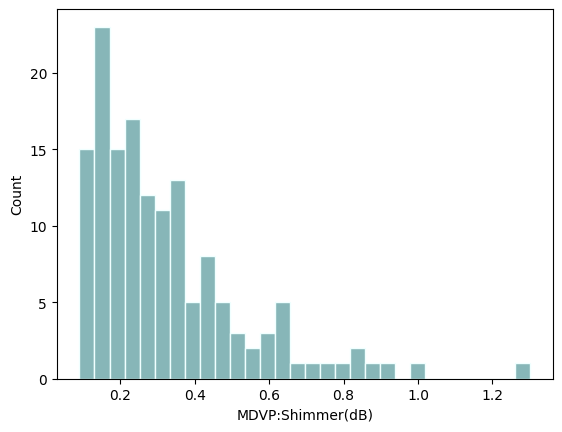

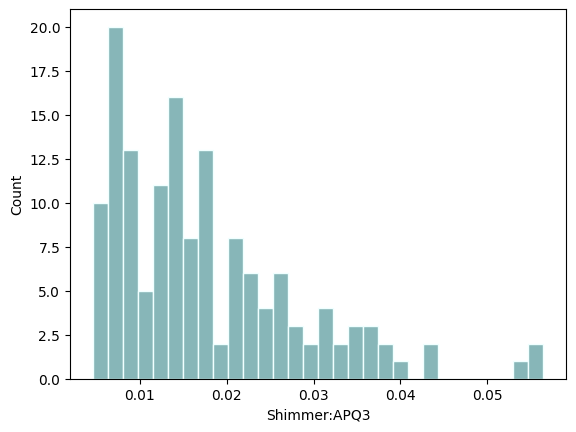

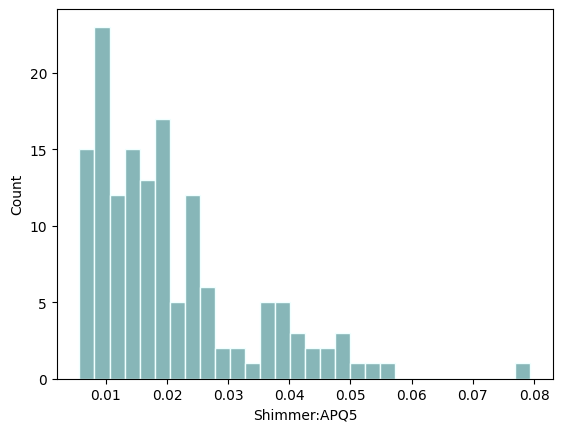

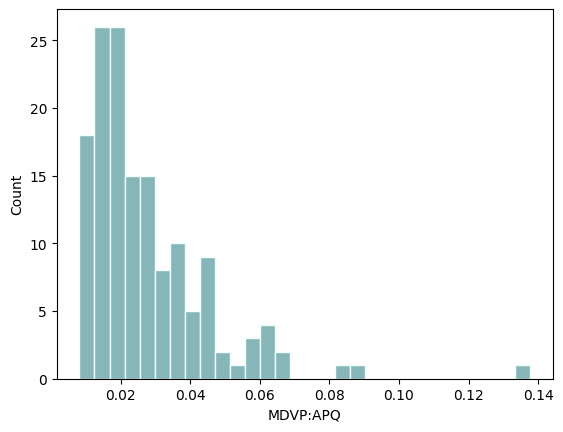

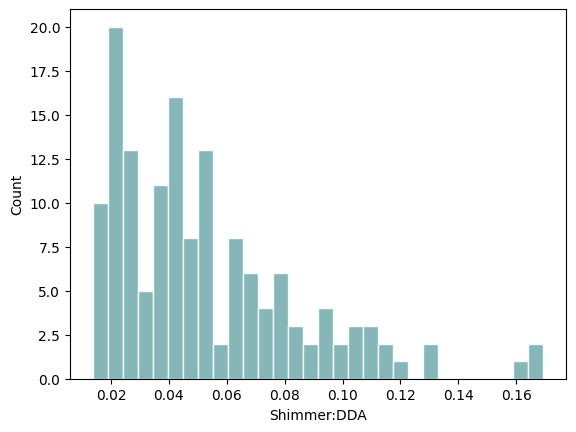

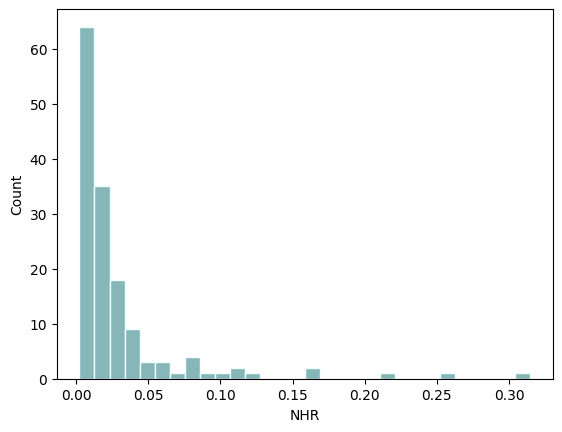

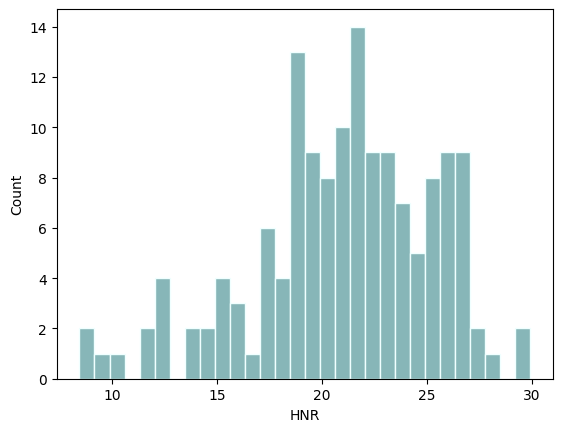

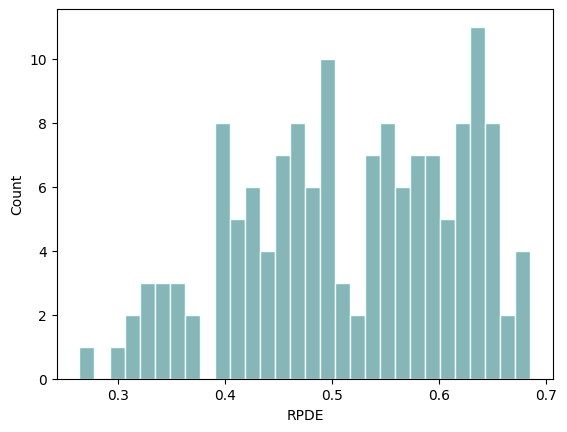

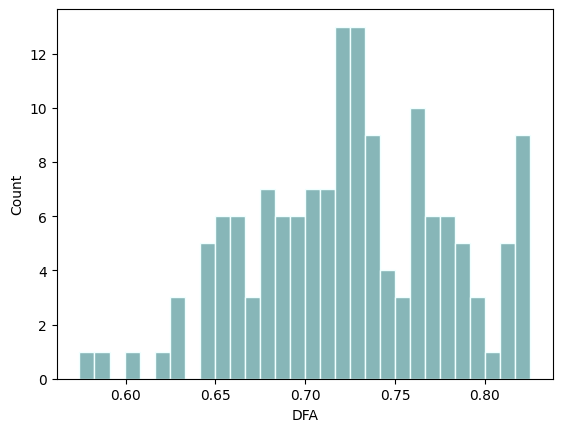

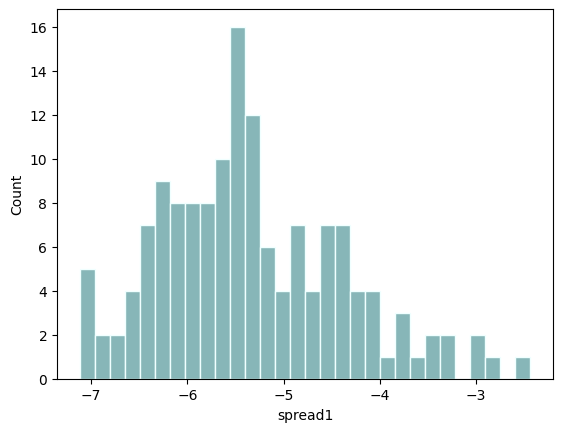

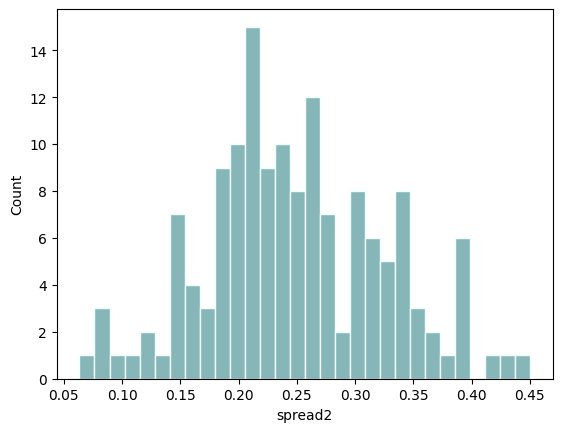

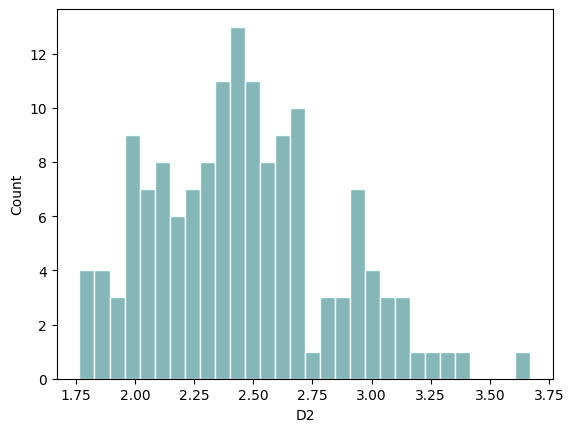

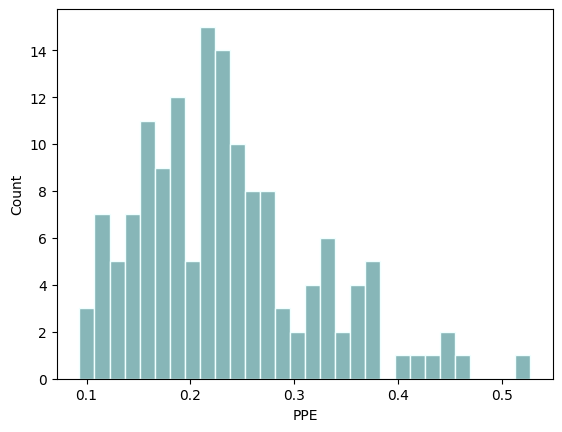

In [86]:
#histograms for patient status
for column in patient_features:
    sns.histplot(data=patient_df, x=column, bins=30, fill=True, color="cadetblue", edgecolor="azure")
    plt.show()

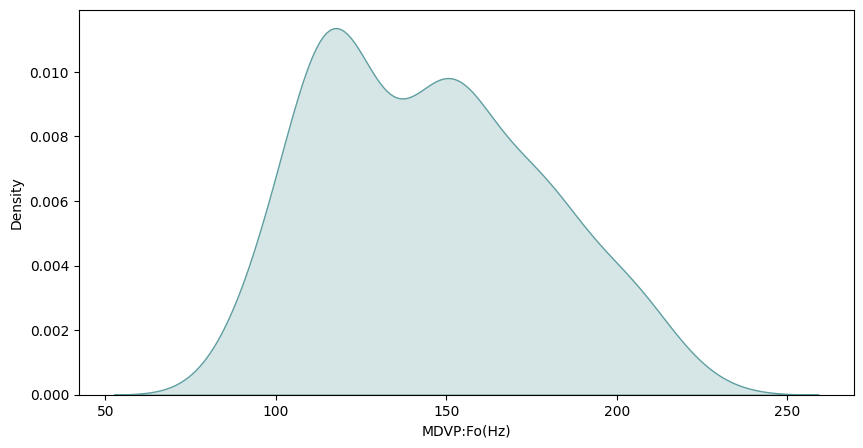

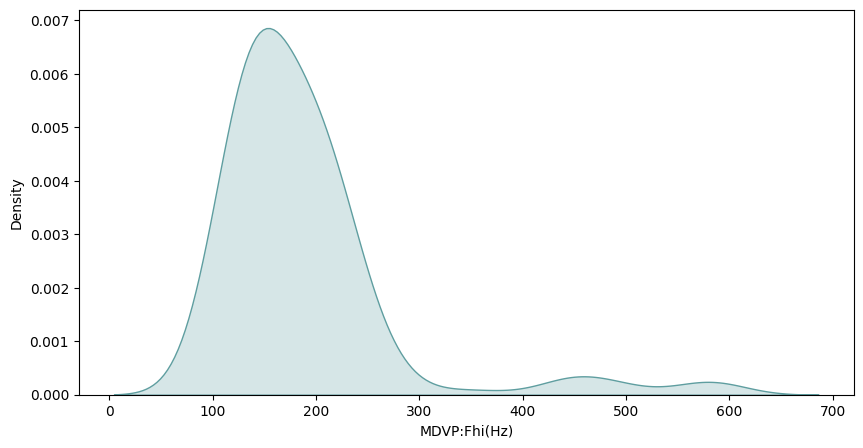

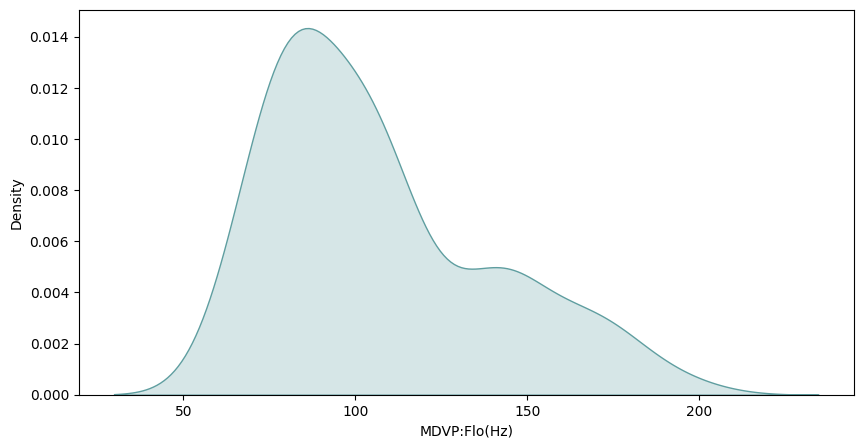

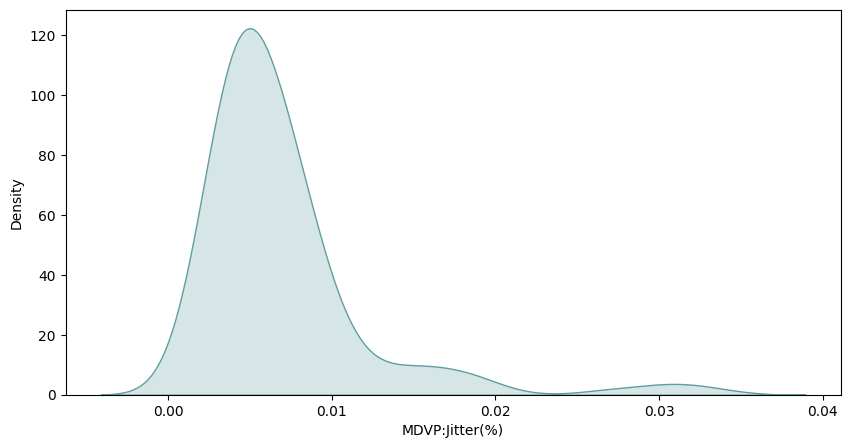

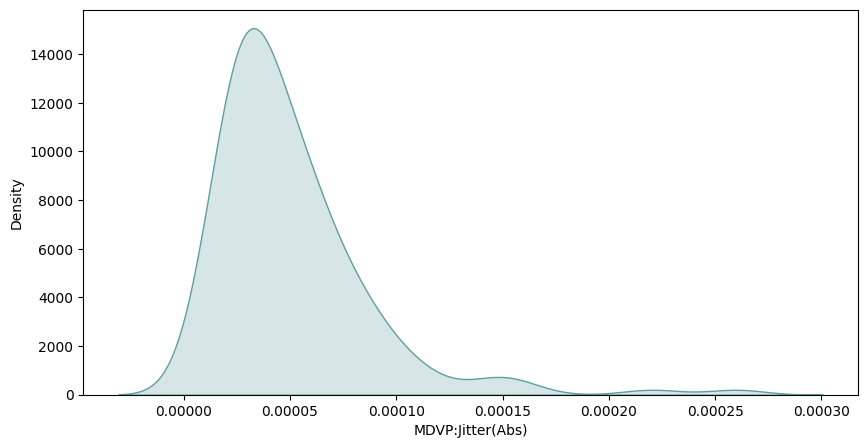

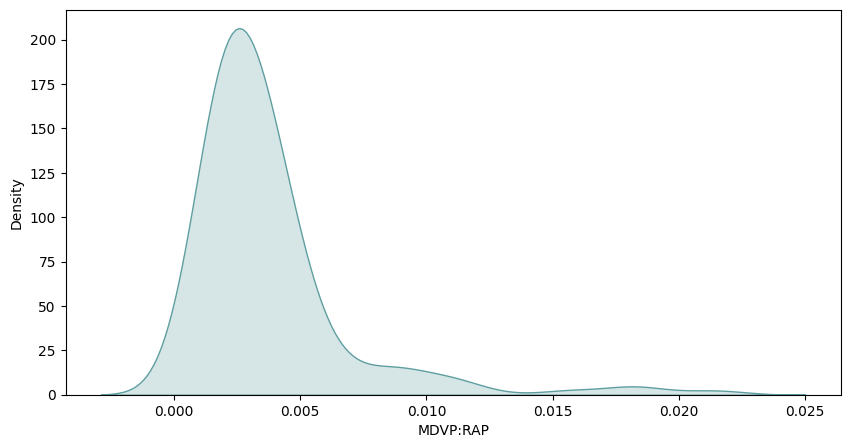

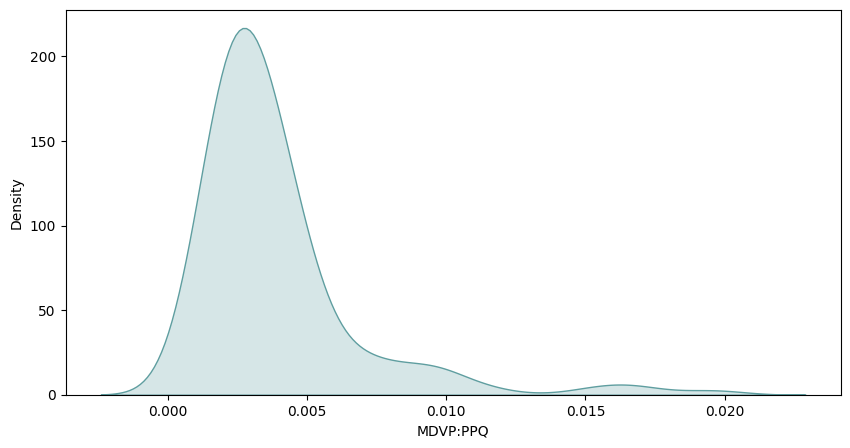

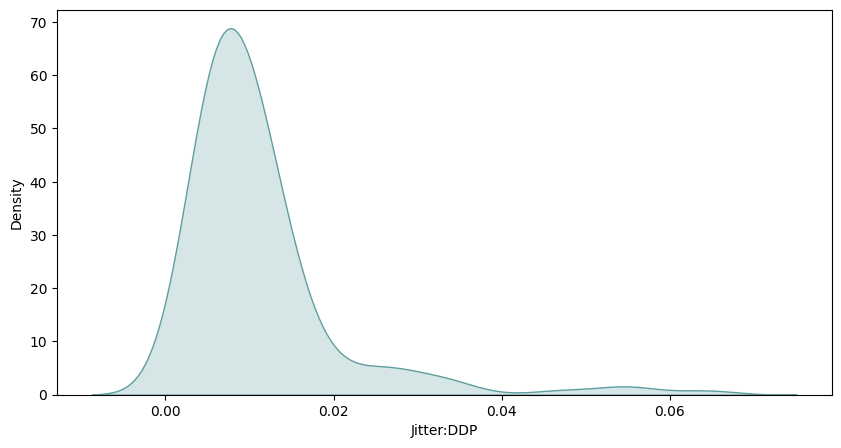

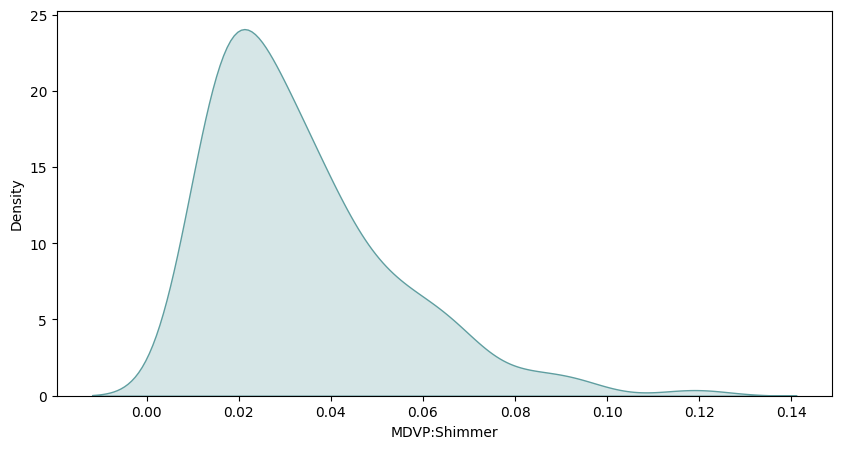

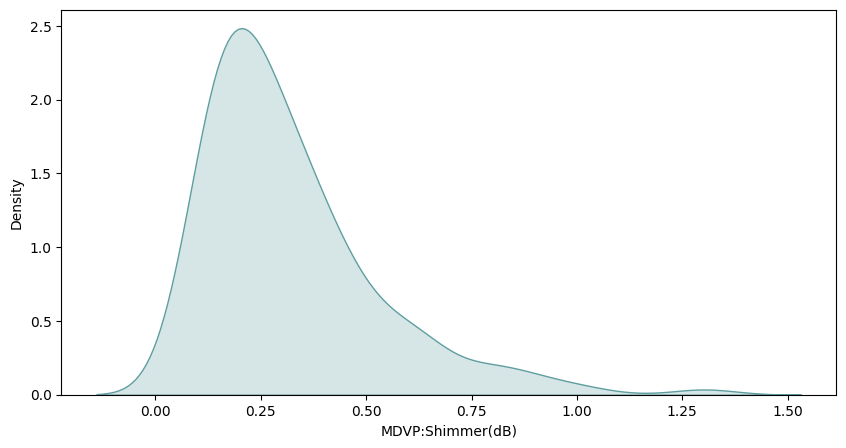

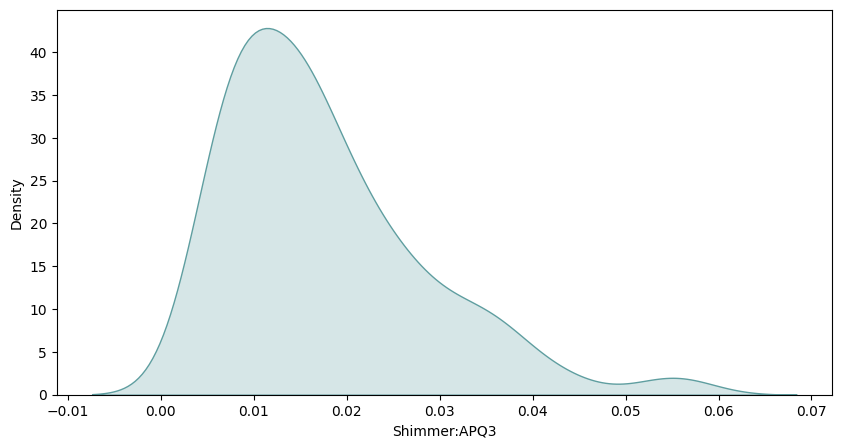

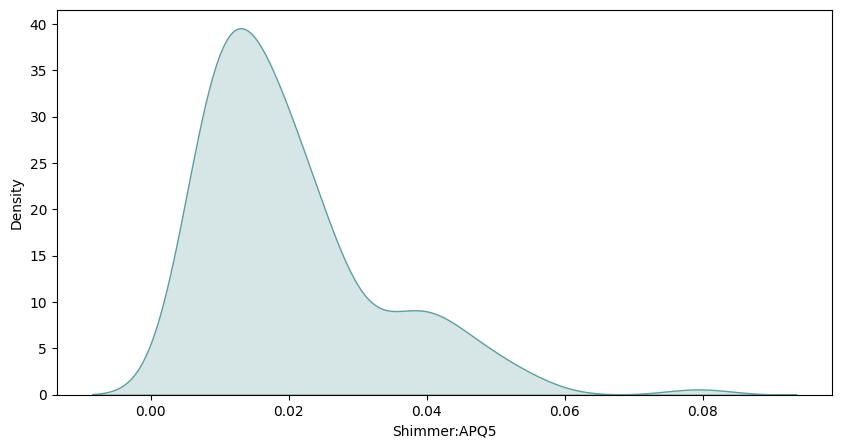

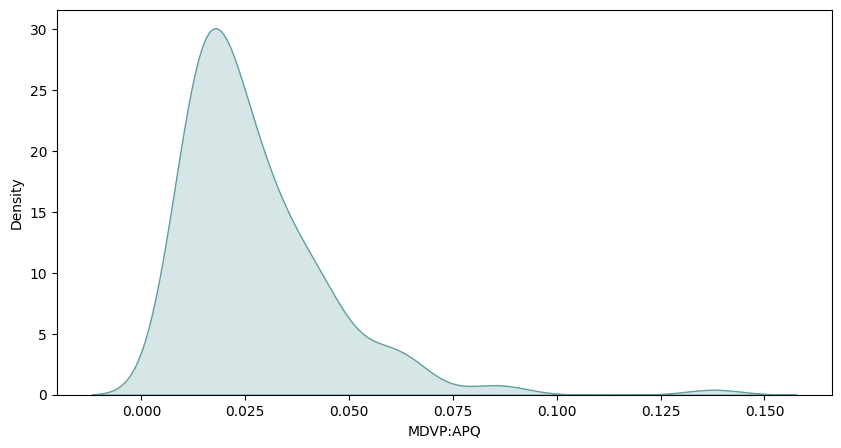

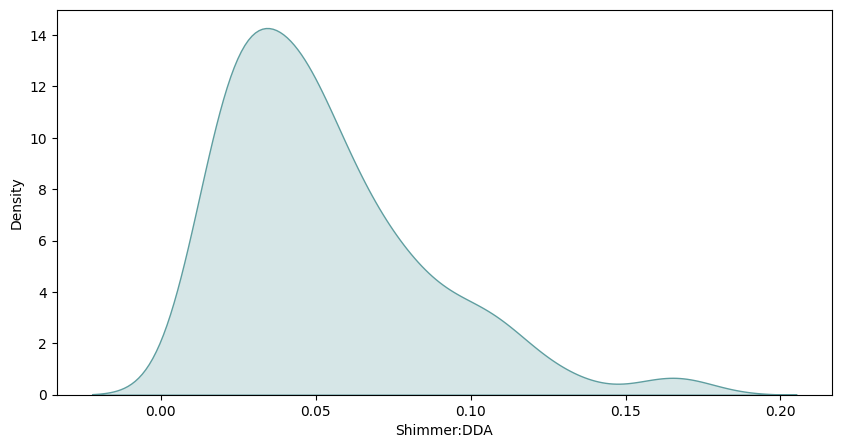

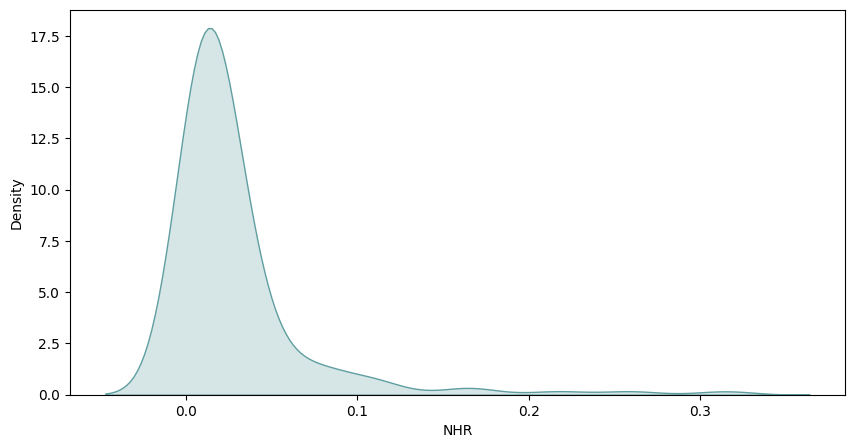

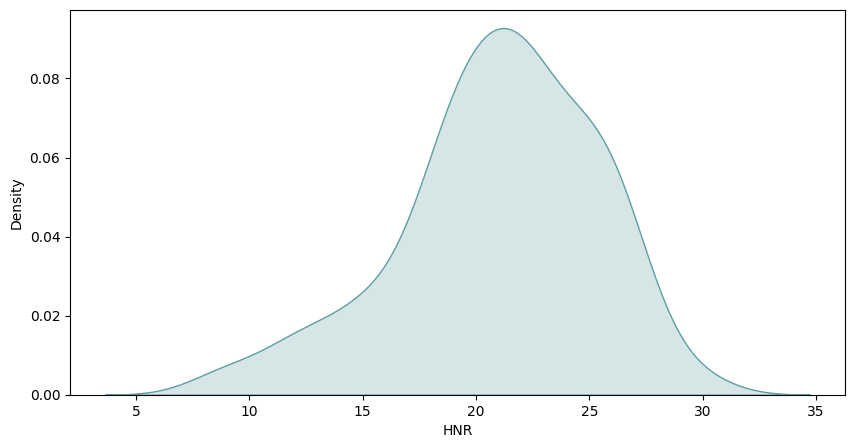

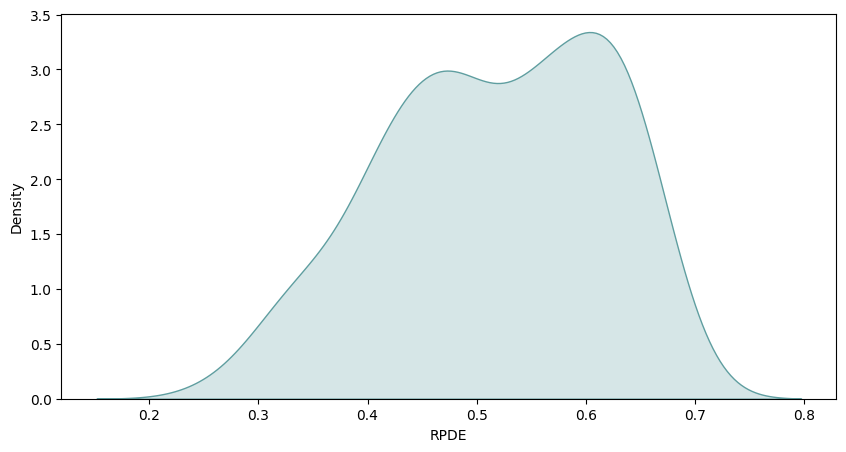

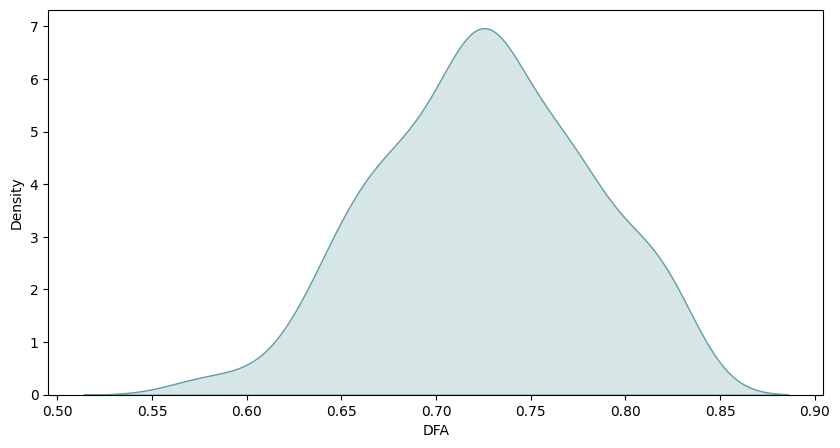

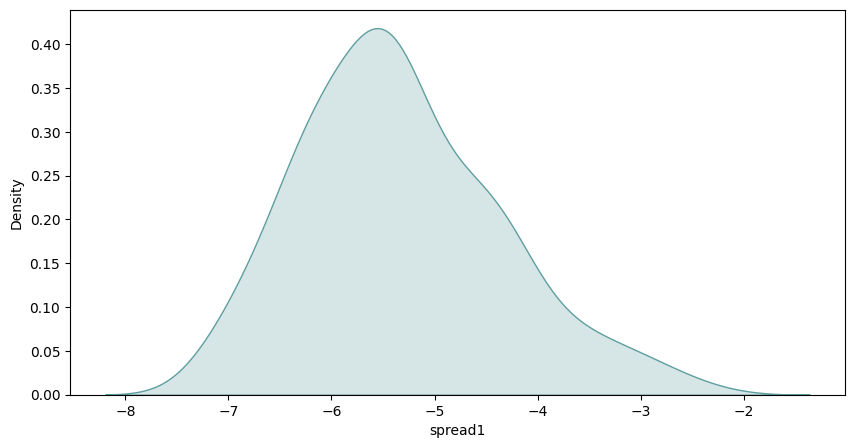

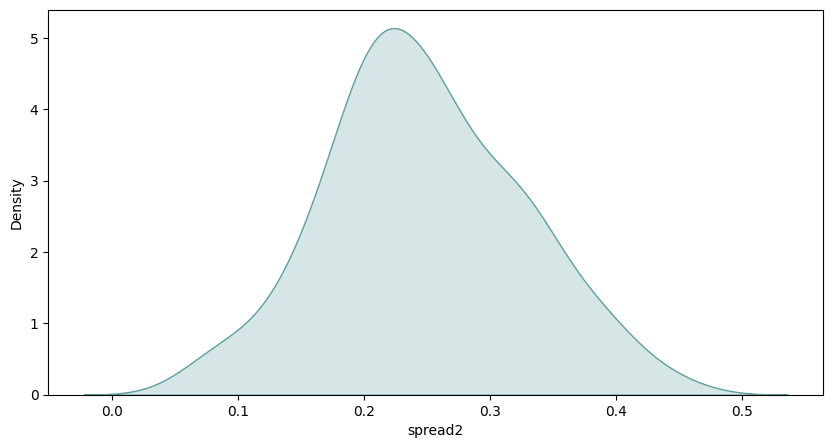

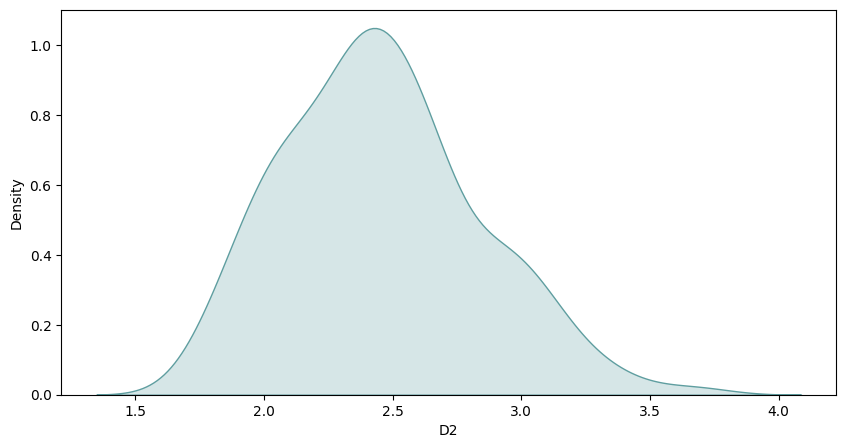

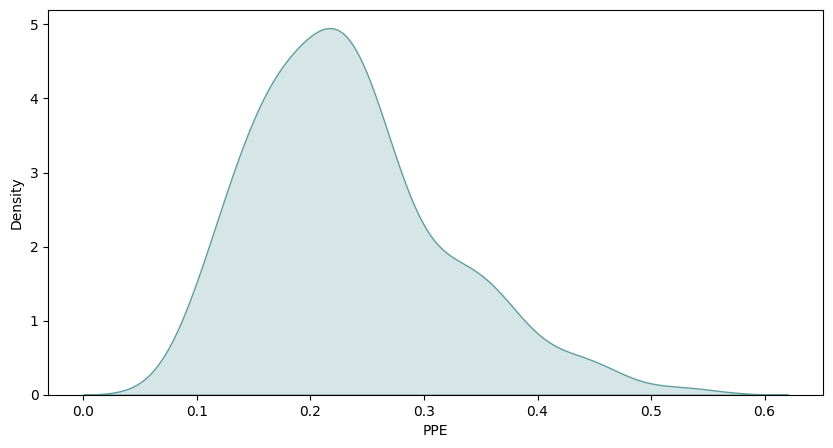

In [85]:
#kernel density estimation for patient status
for columns in patient_features:
    plt.figure(figsize=(10, 5))
    sns.kdeplot(data=patient_df, x=columns, fill=True, color="cadetblue")
    plt.show()

<h2>Correlation Analysis</h2>

In [88]:
corr_matrix = num_dataframe.corr(method="pearson") #correlation matrix for the numerical dataframe
corr_healthy = healthy_dropped.corr(method="pearson") #correlation matrix for healthy subjects
corr_patient = patient_dropped.corr(method="pearson") #correlation matrix for patients

<Axes: >

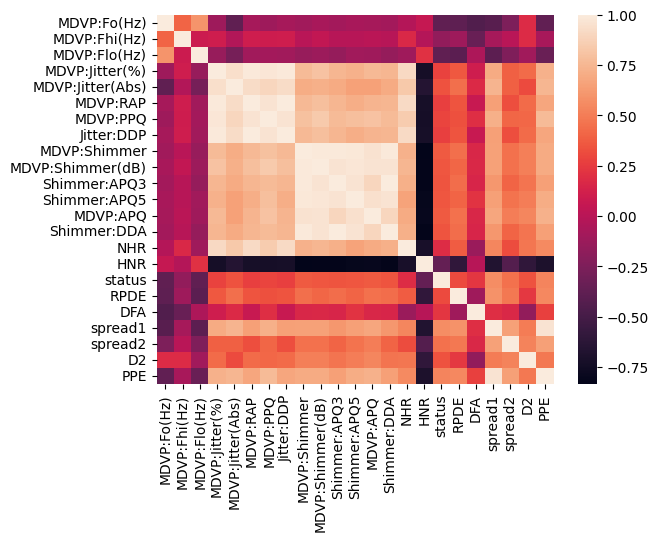

In [89]:
sns.heatmap(corr_matrix)

<Axes: >

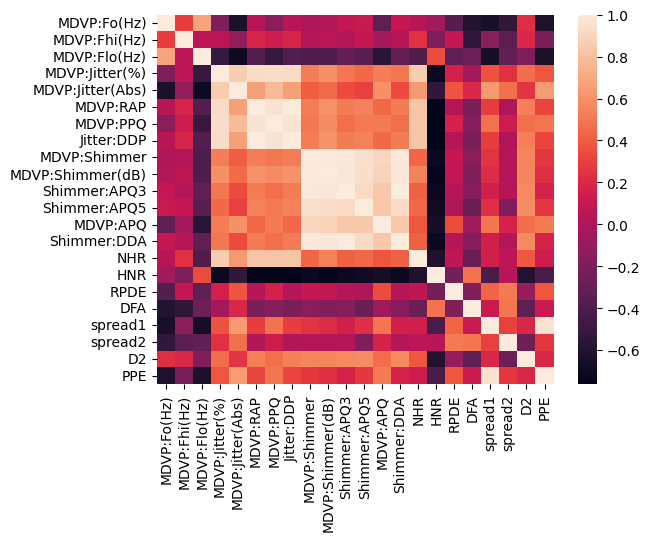

In [62]:
sns.heatmap(corr_healthy) #correlation heatmap for healthy subjects

<Axes: >

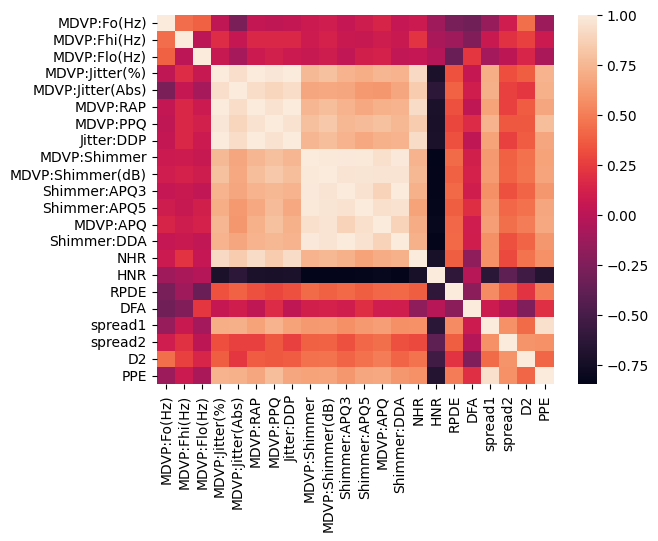

In [63]:
sns.heatmap(corr_patient) #correlation heatmap for patients

In [ ]:
corr_matrix.loc[["status"]] #correlation of status with features in the numerical dataframe

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
status,-0.383535,-0.166136,-0.3802,0.27822,0.338653,0.266668,0.288698,0.266646,0.36743,0.350697,0.347617,0.351148,0.364316,0.347608,0.189429,-0.361515,1.0,0.308567,0.231739,0.564838,0.454842,0.340232,0.531039


In [26]:
#creating dictionary with feature sets above a correlation threshold value
# corr_threshold = 0.8
# high_corr = corr_matrix.where(abs(corr_matrix) > corr_threshold).stack().to_dict()